# **PRUEBA TÉCNICA INGENIERO SENIOR DE DATOS**
## *Por: Sergio Martínez*

### CASO 1. ANALÍTICA DE DATOS

Objetivo. Facilitar la toma de decisiones sobre qué clientes deben ser atendidos de manera personalizada por un Ingeniero de Riesgos, y cuáles deben recibir un relacionamiento masivo.

Herramientas utilizadas: Lenguaje de programación (Python), VSCode, SQL.

**PROPUESTA DE DESARROLLO**

        0. Preparación Inicial del Entorno

        1. Contextualización de la Base de Datos.
    
        2. Limpieza y depuración.
                2.1 Manejo de datos con errores.
                2.2 Manejo de datos faltantes / nulls. 
                2.3 Manejo de outliers.
                2.4 Consolidación base para análisis.

        3.  Análisis exploratorio inicial (EDA)
                3.1 Estadísticos descriptivos
                3.2 Histogramas
                3.3 Boxplots
        
        4. Gestión del sesgo y asimetría.
                4.1 Transformación lognormal a variables numéricas.
                4.2 Comprobación con estadísticos como curtosis y asimetría.
        
        5. Clusterización preliminar de clientes 
                5.1 Kmeans y KNN con n=2 clusters.
                5.2 Medición de capacidad de ingenieros.
                5.3 Propuesta de creación 3er cluster.

        6. Aplicación de Bonus para enriquecer modelo.
                6.1 Determinación de prob_siniestro
                        6.1.1 KNN como modelo de entrenamiento y ajuste siendo Y(prob_siniestro)
                6.2 Determinación de num_productos
                6.3 Clusterización final con 3 clusters y basados en umbrales de decisión.

### 0. PREPARACIÓN INICIAL DEL ENTORNO
Se setea un entorno virtual en Python y se trabaja desde Visual Studio Code. 

Se especifica la paquetería necesaria para la ejecución del script:

    "pandas pydotplus numpy matplotlib seaborn statsmodels pandasql openpyxl"

In [90]:
#INICIALIZATION OF VIRTUAL ENVIRONMENT

##Creación del entorno
    #python -m venv bolivar_final-env   # This creates an virtual environment named "titanic_entorno-env"

## Inicialización del entorno
    #bolivar_final-env\Scripts\activate


#COMPROBAR QUE SE ESTÁ EN EL ENTORNO VIRTUAL Y EN LA CARPETA DEL ENTORNO VIRTUAL



#INSTALACIÓN DE LIBRERIAS
# pip install ipykernel
#python -m ipykernel install --user --name=bolivar_prueba-env ///Installed kernelspec bolivar_prueba-env in C:\Users\smart\AppData\Roaming\jupyter\kernels\bolivar_prueba-env

# pip install pandas pydotplus numpy matplotlib seaborn statsmodels pandasql openpyxl

In [91]:
import pandas as pd
import numpy as np
import datetime
import openpyxl
import pandasql as ps




ruta_archivo = "C:/Users/smart/Downloads/BD Punto 1 (1).xlsx"
df = pd.read_excel(ruta_archivo, sheet_name="datos_lago.csv") 


Vamos a filtrar el df inicial para que solo nos muestre los IDS o clientes que han adquirido el PRODUCTO 24, claramente también se trae información respecto a otros PRODUCTOS del mismo cliente.

In [92]:

ids_producto24 = df.loc[df['NOMBRE_RAMO_EMISION'] == 'PRODUCTO 24', 'ID'].unique()
df2 = df.loc[df['ID'].isin(ids_producto24)].copy()


In [93]:
df2.describe()

,ID,ANO_CONSTITUCION,ANTIGUEDAD_CLIENTE,ANO_POLIZA,TOTAL_INGRESOS_OPERATIVOS,CODIGO_RAMO_EMISION,VALOR_ASEGURADO,PRIMA_EMITIDA,CANTIDAD_SINIESTROS_DESDE_2019,LIQUIDADO_DESDE_2019
count,10698.000000,10671.000000,9063.000000,10689.000000,1.068900e+04,10698.000000,1.067700e+04,1.067700e+04,6652.000000,6.652000e+03
mean,557514.715554,1998.502390,12.764978,2021.999626,3.307095e+15,51.860535,3.924685e+11,1.387300e+08,127.390710,1.033900e+09
std,259099.176098,15.107759,8.897497,0.814929,9.804917e+15,94.991229,1.277319e+13,2.404528e+09,2434.692964,2.200679e+10
min,111901.000000,1932.000000,0.000000,2021.000000,0.000000e+00,1.000000,0.000000e+00,0.000000e+00,1.000000,0.000000e+00
25%,329993.000000,1989.000000,5.000000,2021.000000,1.840804e+10,7.000000,7.000000e+08,2.418977e+06,2.000000,4.700000e+06
50%,559896.000000,2001.000000,12.000000,2022.000000,6.203151e+10,15.000000,7.500000e+09,7.820209e+06,4.000000,2.534376e+07
75%,792490.000000,2011.000000,21.000000,2023.000000,3.978192e+11,29.000000,4.046087e+10,2.703750e+07,13.000000,1.172032e+08
max,999850.000000,2022.000000,28.000000,2023.000000,7.169597e+16,310.000000,8.700414e+14,1.015817e+11,108649.000000,1.062143e+12


In [94]:
df2

,ID,ciudad,region,GRUPO_SECTOR,ANO_CONSTITUCION,ANTIGUEDAD_CLIENTE,ANO_POLIZA,TOTAL_INGRESOS_OPERATIVOS,CODIGO_RAMO_EMISION,NOMBRE_RAMO_EMISION,VALOR_ASEGURADO,PRIMA_EMITIDA,CANTIDAD_SINIESTROS_DESDE_2019,LIQUIDADO_DESDE_2019
0,111901.0,Cali,Valle del Cauca,G - comercio al por mayor y al por menor; repa...,2005.0,3.0,2021.0,4.395881e+09,66.0,PRODUCTO 16,1.748899e+10,11030693.0,NaN,NaN
1,111901.0,Cali,Valle del Cauca,G - comercio al por mayor y al por menor; repa...,2005.0,3.0,2022.0,5.251830e+15,66.0,PRODUCTO 16,1.748899e+10,11030693.0,NaN,NaN
2,111901.0,Cali,Valle del Cauca,G - comercio al por mayor y al por menor; repa...,2005.0,3.0,2023.0,5.141507e+09,66.0,PRODUCTO 16,1.748899e+10,11030693.0,NaN,NaN
3,111901.0,Cali,Valle del Cauca,G - comercio al por mayor y al por menor; repa...,2005.0,3.0,2021.0,4.395881e+09,15.0,PRODUCTO 24,1.472254e+10,11650146.0,2.0,1915714.0
4,111901.0,Cali,Valle del Cauca,G - comercio al por mayor y al por menor; repa...,2005.0,3.0,2022.0,5.251830e+15,15.0,PRODUCTO 24,1.472254e+10,11650146.0,2.0,1915714.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11851,999850.0,Santa Marta,Magdalena,H - transporte y almacenamiento,2012.0,2.0,2022.0,6.530415e+15,10.0,PRODUCTO 17,8.700000e+09,2165622.0,NaN,NaN
11852,999850.0,Santa Marta,Magdalena,H - transporte y almacenamiento,2012.0,2.0,2021.0,1.139401e+10,310.0,PRODUCTO 21,0.000000e+00,14151200.0,NaN,NaN
11853,999850.0,Santa Marta,Magdalena,H - transporte y almacenamiento,2012.0,2.0,2022.0,6.530415e+15,310.0,PRODUCTO 21,0.000000e+00,14151200.0,NaN,NaN
11854,999850.0,Santa Marta,Magdalena,H - transporte y almacenamiento,2012.0,2.0,2021.0,1.139401e+10,15.0,PRODUCTO 24,2.734076e+09,4766828.0,5.0,50262946.0


TRANSFORMACIÓN DE LA COLUMNA INGRESOS_OPERATIVOS:

Se sigue la siguiente lógica:

Se eliminaron o transformaron registros con valores inconsistentes en INGRESOS_OPERATIVOS, aplicando un umbral basado en referencias externas. El proceso seguido fue el siguiente: 

o	Paso 1: Se intentó reemplazar el valor extremo con el valor correspondiente del mismo producto en el año anterior o posterior.

o	Paso 2: Si no se encontró un valor válido en los años vecinos, se intentó reemplazarlo con la mediana de otros productos del mismo cliente.

o	Paso 3: Si no se encontró un valor en el paso anterior, se utilizó la mediana del producto específico (PRODUCTO).

o	Paso 4: Si aún no se había encontrado un valor adecuado, se usó la mediana general.


In [95]:
import numpy as np

umbral = 1.2e+13

if 'TOTAL_INGRESOS_OPERATIVOS_CORREGIDOS' not in df2.columns:
    df2['TOTAL_INGRESOS_OPERATIVOS_CORREGIDOS'] = df2['TOTAL_INGRESOS_OPERATIVOS']

validos = df2[df2['TOTAL_INGRESOS_OPERATIVOS'] <= umbral]
mediana_por_producto = (
    validos.groupby('NOMBRE_RAMO_EMISION')['TOTAL_INGRESOS_OPERATIVOS']
    .median()
    .to_dict()
)
mediana_total = validos['TOTAL_INGRESOS_OPERATIVOS'].median()

# Se hace un ciclo donde se busca imputar los valores que superan el umbral
for index, row in df2[df2['TOTAL_INGRESOS_OPERATIVOS_CORREGIDOS'] > umbral].iterrows():
    id_actual = row['ID']
    ano_actual = row['ANO_POLIZA']
    producto_actual = row['NOMBRE_RAMO_EMISION']
    
    reemplazo = None

    # Se basan en 4 Reglas.
    # 1. Buscar el mismo producto en el año anterior o siguiente con el MISMO ID
    años_vecinos = [ano_actual - 1, ano_actual + 1]
    vecinos = df2[
        (df2['ID'] == id_actual) &
        (df2['NOMBRE_RAMO_EMISION'] == producto_actual) &
        (df2['ANO_POLIZA'].isin(años_vecinos)) &
        (df2['TOTAL_INGRESOS_OPERATIVOS'] <= umbral)
    ]

    if not vecinos.empty:
        reemplazo = vecinos['TOTAL_INGRESOS_OPERATIVOS'].values[0]

    # 2. Buscar en otros productos del mismo cliente
    if reemplazo is None:
        otros_productos = df2[
            (df2['ID'] == id_actual) &
            (df2['NOMBRE_RAMO_EMISION'] != producto_actual) &
            (df2['TOTAL_INGRESOS_OPERATIVOS'] <= umbral)
        ]
        if not otros_productos.empty:
            reemplazo = otros_productos['TOTAL_INGRESOS_OPERATIVOS'].median()

    # 3. Se imputa la Mediana por producto
    if reemplazo is None and producto_actual in mediana_por_producto:
        reemplazo = mediana_por_producto[producto_actual]

    # 4. Se imputa la Mediana general
    elif reemplazo is None and not np.isnan(mediana_total):
        reemplazo = mediana_total

    # 5. Asignar solo si encontramos un reemplazo
    if reemplazo is not None:
        df2.at[index, 'TOTAL_INGRESOS_OPERATIVOS_CORREGIDOS'] = reemplazo


CONFIRMACIÓN DF ORIGINAL vs DF CON INGRESOS_OPERATIVOS_CORREGIDOS

Se evidencia una mejoría en el comportamiento del df en la variable, además ya no existen valores irreales.

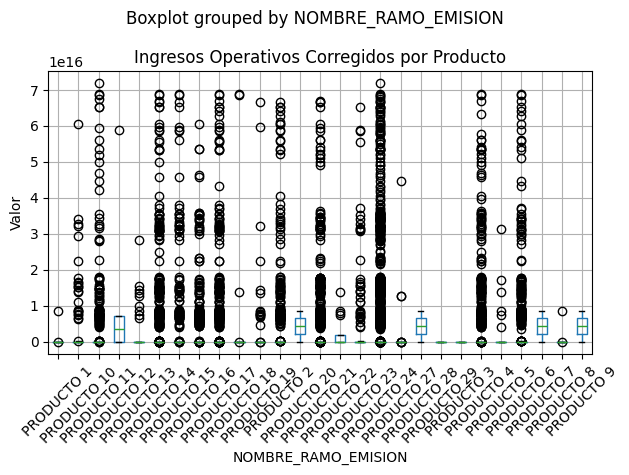

In [96]:
import matplotlib.pyplot as plt

df2.boxplot(column='TOTAL_INGRESOS_OPERATIVOS', by='NOMBRE_RAMO_EMISION', rot=90)
plt.title("Ingresos Operativos Corregidos por Producto")
plt.ylabel("Valor")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



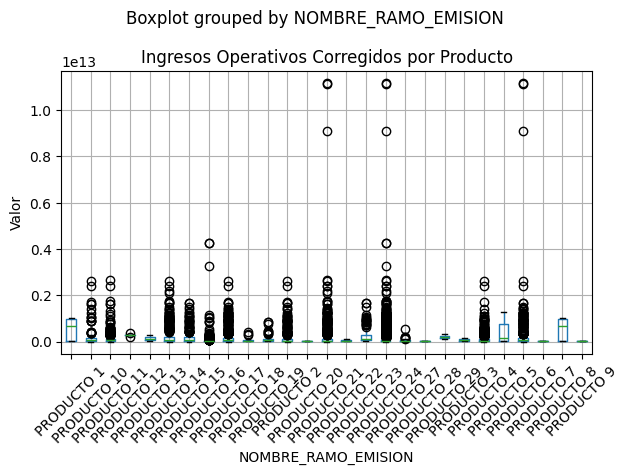

In [97]:

df2.boxplot(column='TOTAL_INGRESOS_OPERATIVOS_CORREGIDOS', by='NOMBRE_RAMO_EMISION', rot=90)
plt.title("Ingresos Operativos Corregidos por Producto")
plt.ylabel("Valor")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



In [98]:
valores_restantes = df2[df2['TOTAL_INGRESOS_OPERATIVOS_CORREGIDOS'] > umbral]
print("Valores aún mayores a 1.2e+13:", valores_restantes.shape[0])

Valores aún mayores a 1.2e+13: 0


### B. Manejo de datos faltantes (nulls)

In [99]:
# Verificar valores faltantes
df2.isnull().sum()


ID                                         0
ciudad                                     0
region                                     0
GRUPO_SECTOR                               0
ANO_CONSTITUCION                          27
ANTIGUEDAD_CLIENTE                      1635
ANO_POLIZA                                 9
TOTAL_INGRESOS_OPERATIVOS                  9
CODIGO_RAMO_EMISION                        0
NOMBRE_RAMO_EMISION                        0
VALOR_ASEGURADO                           21
PRIMA_EMITIDA                             21
CANTIDAD_SINIESTROS_DESDE_2019          4046
LIQUIDADO_DESDE_2019                    4046
TOTAL_INGRESOS_OPERATIVOS_CORREGIDOS       9
dtype: int64

### IMPUTACIÓN DE VARIABLES NUMÉRICAS

**Manejo faltantes ‘Antigüedad_Cliente’**

Para estos casos, se utilizó la mediana de la antigüedad de los clientes por grupo ANO_CONSTITUCION. 

Se implementó una función que asegura que la antigüedad no sea mayor que el año de constitución, y se imputaron los valores faltantes con la mediana del grupo correspondiente.

**Manejo faltantes ‘Valor_Asegurado’ y ‘Prima_Emitida’**

Se utilizó la mediana de cada una de las columnas, ya que se considera que estos valores representan cantidades que se distribuyen de manera extremadamente sesgada.

**Manejo faltantes ‘Cantidad_Siniestros y ‘Liquidado_desde_2019**

Se asume que los valores faltantes representan información crucial, se imputaron con un valor de cero, ya que se considera que estos valores reflejan casos sin siniestros o sin liquidaciones.

**Manejo faltantes Otras Variables**

Se considera que registros nulos para otras variables con valores categóricos deben ser eliminados para no alterar el comportamiento del modelo futuro.


In [100]:
# Paso 1: Imputar 'Antigüedad Cliente' basada en la mediana del grupo por 'Año de Constitución'
# Definimos una función para verificar que la antigüedad no sea mayor al año de constitución
def imputar_antiguedad(row):
    if pd.isna(row['ANTIGUEDAD_CLIENTE']):
        # Filtramos el DataFrame para obtener la mediana por 'ANO_CONSTITUCION'
        median_antiguedad = df2[df2['ANO_CONSTITUCION'] == row['ANO_CONSTITUCION']]['ANTIGUEDAD_CLIENTE'].median()
        # Imputamos la mediana, asegurándonos de que la antigüedad no sea mayor que el año de constitución
        max_antiguedad = row['ANO_CONSTITUCION'] - 1900  # Suponiendo que 'ANO_CONSTITUCION' está en formato de 4 dígitos
        return min(median_antiguedad, max_antiguedad)
    else:
        return row['ANTIGUEDAD_CLIENTE']
df2['ANTIGUEDAD_CLIENTE'] = df2.apply(imputar_antiguedad, axis=1)




# Paso 2: Eliminar registros con 'Año de Constitución' faltante
df2 = df2.dropna(subset=['ANO_CONSTITUCION'])




# Paso 3: Imputar 'Cantidad de Siniestros' y 'Liquidado' con cero donde estén nulos
df2['CANTIDAD_SINIESTROS_DESDE_2019'].fillna(0, inplace=True)
df2['LIQUIDADO_DESDE_2019'].fillna(0, inplace=True)


# Paso 4: Imputar con la mediana VALOR_ASEGURADO
# 
df2['VALOR_ASEGURADO'].fillna(df2['VALOR_ASEGURADO'].median(), inplace=True)


# Paso 5: Imputar con la mediana PRIMA_EMITIDA
df2['PRIMA_EMITIDA'].fillna(df2['PRIMA_EMITIDA'].median(), inplace=True)

# Verifica el DataFrame resultante
print(df2.head())



d:\CHECHO\Codigo_Prueba_SegurosBolivar\bolivar_final-env\Lib\site-packages\numpy\lib\_nanfunctions_impl.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
d:\CHECHO\Codigo_Prueba_SegurosBolivar\bolivar_final-env\Lib\site-packages\numpy\lib\_nanfunctions_impl.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
d:\CHECHO\Codigo_Prueba_SegurosBolivar\bolivar_final-env\Lib\site-packages\numpy\lib\_nanfunctions_impl.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


         ID ciudad           region  \
0  111901.0   Cali  Valle del Cauca   
1  111901.0   Cali  Valle del Cauca   
2  111901.0   Cali  Valle del Cauca   
3  111901.0   Cali  Valle del Cauca   
4  111901.0   Cali  Valle del Cauca   

                                        GRUPO_SECTOR  ANO_CONSTITUCION  \
0  G - comercio al por mayor y al por menor; repa...            2005.0   
1  G - comercio al por mayor y al por menor; repa...            2005.0   
2  G - comercio al por mayor y al por menor; repa...            2005.0   
3  G - comercio al por mayor y al por menor; repa...            2005.0   
4  G - comercio al por mayor y al por menor; repa...            2005.0   

   ANTIGUEDAD_CLIENTE  ANO_POLIZA  TOTAL_INGRESOS_OPERATIVOS  \
0                 3.0      2021.0               4.395881e+09   
1                 3.0      2022.0               5.251830e+15   
2                 3.0      2023.0               5.141507e+09   
3                 3.0      2021.0               4.395881e+09   


d:\CHECHO\Codigo_Prueba_SegurosBolivar\bolivar_final-env\Lib\site-packages\numpy\lib\_nanfunctions_impl.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
d:\CHECHO\Codigo_Prueba_SegurosBolivar\bolivar_final-env\Lib\site-packages\numpy\lib\_nanfunctions_impl.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
d:\CHECHO\Codigo_Prueba_SegurosBolivar\bolivar_final-env\Lib\site-packages\numpy\lib\_nanfunctions_impl.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
d:\CHECHO\Codigo_Prueba_SegurosBolivar\bolivar_final-env\Lib\site-packages\numpy\lib\_nanfunctions_impl.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
d:\CHECHO\Codigo_Prueba_SegurosBolivar\bolivar_final-env\Lib\site-packages\numpy\lib\_nanfunctions_impl.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis

Eliminación de otras columnas donde no se decide imputar información 

In [101]:
# Verificar la cantidad de valores nulos en cada columna
print(df2.isnull().sum())
#print(df3.isnull().sum())


ID                                       0
ciudad                                   0
region                                   0
GRUPO_SECTOR                             0
ANO_CONSTITUCION                         0
ANTIGUEDAD_CLIENTE                      12
ANO_POLIZA                               9
TOTAL_INGRESOS_OPERATIVOS                9
CODIGO_RAMO_EMISION                      0
NOMBRE_RAMO_EMISION                      0
VALOR_ASEGURADO                          0
PRIMA_EMITIDA                            0
CANTIDAD_SINIESTROS_DESDE_2019           0
LIQUIDADO_DESDE_2019                     0
TOTAL_INGRESOS_OPERATIVOS_CORREGIDOS     9
dtype: int64


In [102]:
# Eliminar filas que contengan valores nulos
df2_clean = df2.dropna()
print(df2_clean.head())


         ID ciudad           region  \
0  111901.0   Cali  Valle del Cauca   
1  111901.0   Cali  Valle del Cauca   
2  111901.0   Cali  Valle del Cauca   
3  111901.0   Cali  Valle del Cauca   
4  111901.0   Cali  Valle del Cauca   

                                        GRUPO_SECTOR  ANO_CONSTITUCION  \
0  G - comercio al por mayor y al por menor; repa...            2005.0   
1  G - comercio al por mayor y al por menor; repa...            2005.0   
2  G - comercio al por mayor y al por menor; repa...            2005.0   
3  G - comercio al por mayor y al por menor; repa...            2005.0   
4  G - comercio al por mayor y al por menor; repa...            2005.0   

   ANTIGUEDAD_CLIENTE  ANO_POLIZA  TOTAL_INGRESOS_OPERATIVOS  \
0                 3.0      2021.0               4.395881e+09   
1                 3.0      2022.0               5.251830e+15   
2                 3.0      2023.0               5.141507e+09   
3                 3.0      2021.0               4.395881e+09   


In [103]:

print(df2_clean.isnull().sum())
#df2

ID                                      0
ciudad                                  0
region                                  0
GRUPO_SECTOR                            0
ANO_CONSTITUCION                        0
ANTIGUEDAD_CLIENTE                      0
ANO_POLIZA                              0
TOTAL_INGRESOS_OPERATIVOS               0
CODIGO_RAMO_EMISION                     0
NOMBRE_RAMO_EMISION                     0
VALOR_ASEGURADO                         0
PRIMA_EMITIDA                           0
CANTIDAD_SINIESTROS_DESDE_2019          0
LIQUIDADO_DESDE_2019                    0
TOTAL_INGRESOS_OPERATIVOS_CORREGIDOS    0
dtype: int64


### 3. CONSOLIDACIÓN Y AGRUPACIÓN DE VARIABLES DE INTERÉS

**DESARROLLO PUNTO 1. CONSULTA SQL**

Se importa la librería *'pandasql'* que permite ejecutar consultas en lenguaje SQL en un notebook de Py. 

In [104]:
import pandasql as ps

query = """
SELECT 
    GRUPO_SECTOR,
    COUNT(DISTINCT ID) AS NUM_CLIENTES
FROM df2_clean
WHERE 
    ANTIGUEDAD_CLIENTE >= 2
    AND LIQUIDADO_DESDE_2019 > PRIMA_EMITIDA
GROUP BY GRUPO_SECTOR
"""

# Ejecutar consulta
resultado_sql = ps.sqldf(query, locals())


**RESULTADO CONSULTA:**

In [105]:
resultado_sql

,GRUPO_SECTOR,NUM_CLIENTES
0,"A - agricultura, ganaderia, caza, silvicultura...",18
1,B - explotacion de minas y canteras,3
2,C - industrias manufactureras,206
3,E - distribucion de agua; evacuacion y tratami...,1
4,F - construccion,10
5,G - comercio al por mayor y al por menor; repa...,440
6,H - transporte y almacenamiento,57
7,I - alojamiento y servicios de comida,2
8,J - informacion y comunicaciones,5
9,K - financieras y de seguros,2


Se evidencia la gran diferencia de número de clientes para el sector G y C respecto a las demás.

**Verificación final de la BD pre-análisis**

Se obtienen 10650 registros para todas las columnas de interés.

In [106]:
# Revisión de los tipos de datos y valores nulos
print(df2_clean.info())

# Verificar la cantidad de valores nulos
print(df2_clean.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
Index: 10650 entries, 0 to 11855
Data columns (total 15 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   ID                                    10650 non-null  float64
 1   ciudad                                10650 non-null  object 
 2   region                                10650 non-null  object 
 3   GRUPO_SECTOR                          10650 non-null  object 
 4   ANO_CONSTITUCION                      10650 non-null  float64
 5   ANTIGUEDAD_CLIENTE                    10650 non-null  float64
 6   ANO_POLIZA                            10650 non-null  float64
 7   TOTAL_INGRESOS_OPERATIVOS             10650 non-null  float64
 8   CODIGO_RAMO_EMISION                   10650 non-null  float64
 9   NOMBRE_RAMO_EMISION                   10650 non-null  object 
 10  VALOR_ASEGURADO                       10650 non-null  float64
 11  PRIMA_EMITIDA       

### AGRUPACIÓN DE VARIABLES DE INTERÉS

En vista de que buscamos comprender el comportamiento x cliente y no su comportamiento en el tiempo, se decide generar una nueva base 'resultados_sql2' donde se agruparán las variables por año..

Lo anterior se realiza ya que los valores de "VALOR_ASEGURADO", "PRIMA_EMITIDA", "LIQUIDADO_DESDE_2019", "CANTIDAD_DE_SINIESTROS" presentan los mismos valores para los 3 años, ya que su valor es con corte en 2024.

In [107]:
import pandasql as ps

# Supongamos que tu DataFrame se llama df
# La consulta SQL sería:
query = """SELECT 
    ID,
    ciudad,
    region,
    GRUPO_SECTOR,
    MAX(ANO_CONSTITUCION) AS ANO_CONSTITUCION,  -- Usamos MAX porque todos los años serán el mismo
    MAX(ANTIGUEDAD_CLIENTE) AS ANTIGUEDAD_CLIENTE,
    MAX(VALOR_ASEGURADO) AS VALOR_ASEGURADO,  -- Mantenemos el valor constante por años
    MAX(PRIMA_EMITIDA) AS PRIMA_EMITIDA,      -- Mantenemos el valor constante por años
    AVG(TOTAL_INGRESOS_OPERATIVOS_CORREGIDOS) AS TOTAL_INGRESOS_OPERATIVOS_CORREGIDOS,
    NOMBRE_RAMO_EMISION,
    CODIGO_RAMO_EMISION,   -- Mantenemos constante
    MAX(CANTIDAD_SINIESTROS_DESDE_2019) AS CANTIDAD_SINIESTROS_DESDE_2019,  -- Total de siniestros
    MAX(LIQUIDADO_DESDE_2019) AS LIQUIDADO_DESDE_2019  -- Mantenemos constante
    
FROM 
    df2_clean
GROUP BY 
    ID, ciudad, region, GRUPO_SECTOR, NOMBRE_RAMO_EMISION
"""

# Ejecutar consulta
resultado_sql_base_productos = ps.sqldf(query, locals())

In [108]:
resultado_sql_base_productos

,ID,ciudad,region,GRUPO_SECTOR,ANO_CONSTITUCION,ANTIGUEDAD_CLIENTE,VALOR_ASEGURADO,PRIMA_EMITIDA,TOTAL_INGRESOS_OPERATIVOS_CORREGIDOS,NOMBRE_RAMO_EMISION,CODIGO_RAMO_EMISION,CANTIDAD_SINIESTROS_DESDE_2019,LIQUIDADO_DESDE_2019
0,111901.0,Cali,Valle del Cauca,G - comercio al por mayor y al por menor; repa...,2005.0,3.0,1.748899e+10,11030693.0,4.644423e+09,PRODUCTO 16,66.0,0.0,0.0
1,111901.0,Cali,Valle del Cauca,G - comercio al por mayor y al por menor; repa...,2005.0,3.0,1.472254e+10,11650146.0,4.644423e+09,PRODUCTO 24,15.0,2.0,1915714.0
2,111909.0,Bucaramanga,Santander,C - industrias manufactureras,1994.0,18.0,7.236728e+09,0.0,4.534520e+10,PRODUCTO 2,70.0,119.0,590590896.0
3,111909.0,Bucaramanga,Santander,C - industrias manufactureras,1994.0,18.0,1.412390e+11,26894382.0,4.534520e+10,PRODUCTO 24,15.0,9.0,181285852.0
4,112213.0,Puerto Berrio,Antioquia,C - industrias manufactureras,2015.0,5.0,6.961125e+10,44726790.0,9.896008e+09,PRODUCTO 14,5.0,4.0,54441510.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3674,999402.0,Bogota D.C.,Bogota D.C,G - comercio al por mayor y al por menor; repa...,1978.0,12.0,8.521800e+09,7601197.0,1.515440e+10,PRODUCTO 4,1.0,6.0,94380397.0
3675,999850.0,Santa Marta,Magdalena,H - transporte y almacenamiento,2012.0,2.0,2.500000e+07,1155000.0,1.139401e+10,PRODUCTO 15,7.0,0.0,0.0
3676,999850.0,Santa Marta,Magdalena,H - transporte y almacenamiento,2012.0,2.0,8.700000e+09,2165622.0,1.139401e+10,PRODUCTO 17,10.0,0.0,0.0
3677,999850.0,Santa Marta,Magdalena,H - transporte y almacenamiento,2012.0,2.0,0.000000e+00,14151200.0,1.139401e+10,PRODUCTO 21,310.0,0.0,0.0


In [109]:
resultado_sql_base_productos.to_excel("base_agregada_por_producto.xlsx",index=False)

In [206]:
import pandasql as ps

# Supongamos que tu DataFrame se llama df
# La consulta SQL sería:
query = """SELECT 
    ID,
    ciudad,
    region,
    GRUPO_SECTOR,
    MAX(ANO_CONSTITUCION) AS ANO_CONSTITUCION,  -- Usamos MAX porque todos los años serán el mismo
    MAX(ANTIGUEDAD_CLIENTE) AS ANTIGUEDAD_CLIENTE,
    AVG(VALOR_ASEGURADO) AS VALOR_ASEGURADO,  -- Mantenemos el valor constante por años
    AVG(PRIMA_EMITIDA) AS PRIMA_EMITIDA,      -- Mantenemos el valor constante por años
    AVG(TOTAL_INGRESOS_OPERATIVOS_CORREGIDOS) AS TOTAL_INGRESOS_OPERATIVOS_CORREGIDOS,  -- Agregamos por suma
    CODIGO_RAMO_EMISION,   -- Mantenemos constante
    AVG(CANTIDAD_SINIESTROS_DESDE_2019) AS CANTIDAD_SINIESTROS_DESDE_2019,  -- Total de siniestros
    AVG(LIQUIDADO_DESDE_2019) AS LIQUIDADO_DESDE_2019  -- Mantenemos constante
    
FROM 
    df2_clean
GROUP BY 
    ID, ciudad, region, GRUPO_SECTOR
"""

# Ejecutar consulta
resultado_sql2 = ps.sqldf(query, locals())

In [207]:
resultado_sql2

,ID,ciudad,region,GRUPO_SECTOR,ANO_CONSTITUCION,ANTIGUEDAD_CLIENTE,VALOR_ASEGURADO,PRIMA_EMITIDA,TOTAL_INGRESOS_OPERATIVOS_CORREGIDOS,CODIGO_RAMO_EMISION,CANTIDAD_SINIESTROS_DESDE_2019,LIQUIDADO_DESDE_2019
0,111901.0,Cali,Valle del Cauca,G - comercio al por mayor y al por menor; repa...,2005.0,3.0,1.610576e+10,1.134042e+07,4.644423e+09,66.0,1.00,9.578570e+05
1,111909.0,Bucaramanga,Santander,C - industrias manufactureras,1994.0,18.0,7.423784e+10,1.344719e+07,4.534520e+10,70.0,64.00,3.859384e+08
2,112213.0,Puerto Berrio,Antioquia,C - industrias manufactureras,2015.0,5.0,5.920486e+10,2.177590e+07,9.896008e+09,4.0,1.75,2.086632e+07
3,112408.0,Yumbo,Valle del Cauca,G - comercio al por mayor y al por menor; repa...,2008.0,5.0,8.120277e+10,4.029395e+07,1.368014e+11,1.0,4.00,6.575359e+07
4,115210.0,Bogota D.C.,Bogota D.C,G - comercio al por mayor y al por menor; repa...,2009.0,6.0,2.513237e+11,2.034452e+08,5.060908e+11,70.0,7.50,2.310916e+07
...,...,...,...,...,...,...,...,...,...,...,...,...
1143,998158.0,Cali,Valle del Cauca,C - industrias manufactureras,2005.0,2.0,3.840000e+10,9.070000e+06,1.629423e+10,15.0,2.00,9.593798e+06
1144,998472.0,Bogota D.C.,Bogota D.C,G - comercio al por mayor y al por menor; repa...,2009.0,9.0,4.263525e+09,4.302386e+06,4.647091e+09,1.0,0.25,8.494140e+05
1145,999204.0,Medellin,Antioquia,G - comercio al por mayor y al por menor; repa...,1996.0,11.0,4.291209e+09,4.054791e+06,5.215123e+09,1.0,2.50,1.781798e+07
1146,999402.0,Bogota D.C.,Bogota D.C,G - comercio al por mayor y al por menor; repa...,1978.0,12.0,1.069365e+10,9.142559e+06,1.515440e+10,70.0,4.75,3.780985e+07


Finalmente quedamos con un df de 1148 clientes ÚNICOS.

In [208]:
# Revisar las primeras filas
resultado_sql2.head()

# Verificar el número de filas y columnas
resultado_sql2.shape


(1148, 12)

In [209]:
# Verificar si hay valores nulos
resultado_sql2.isnull().sum()
# Comprobar duplicados
resultado_sql2.duplicated().sum()



np.int64(0)

### COMPARACIÓN BASE AGREGADA vs BASE DESAGREGADA

EDA Base desagregada descriptivos

In [113]:
df2_clean.describe()

,ID,ANO_CONSTITUCION,ANTIGUEDAD_CLIENTE,ANO_POLIZA,TOTAL_INGRESOS_OPERATIVOS,CODIGO_RAMO_EMISION,VALOR_ASEGURADO,PRIMA_EMITIDA,CANTIDAD_SINIESTROS_DESDE_2019,LIQUIDADO_DESDE_2019,TOTAL_INGRESOS_OPERATIVOS_CORREGIDOS
count,10650.000000,10650.000000,10650.000000,10650.000000,1.065000e+04,10650.000000,1.065000e+04,1.065000e+04,10650.000000,1.065000e+04,1.065000e+04
mean,557483.346103,1998.535493,12.389390,2022.000094,3.312461e+15,51.893803,3.932643e+11,1.390054e+08,79.525352,6.455959e+08,1.373851e+11
std,259409.943290,15.082224,8.603516,0.814750,9.813199e+15,95.043731,1.278936e+13,2.407568e+09,1925.114106,1.739906e+10,4.059435e+11
min,111901.000000,1932.000000,0.000000,2021.000000,0.000000e+00,1.000000,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00
25%,329993.000000,1989.000000,5.000000,2021.000000,1.841749e+10,7.000000,7.018212e+08,2.431800e+06,0.000000,0.000000e+00,1.299786e+10
50%,559896.000000,2001.000000,11.000000,2022.000000,6.241393e+10,15.000000,7.500000e+09,7.812043e+06,1.000000,2.568414e+06,3.897485e+10
75%,793601.000000,2011.000000,20.000000,2023.000000,3.978192e+11,29.000000,4.034500e+10,2.699929e+07,6.000000,4.415914e+07,1.134006e+11
max,999850.000000,2022.000000,28.000000,2023.000000,7.169597e+16,310.000000,8.700414e+14,1.015817e+11,108649.000000,1.062143e+12,1.114883e+13


EDA Base Agregada Descriptivos

In [210]:
resultado_sql2.describe()

,ID,ANO_CONSTITUCION,ANTIGUEDAD_CLIENTE,VALOR_ASEGURADO,PRIMA_EMITIDA,TOTAL_INGRESOS_OPERATIVOS_CORREGIDOS,CODIGO_RAMO_EMISION,CANTIDAD_SINIESTROS_DESDE_2019,LIQUIDADO_DESDE_2019
count,1148.000000,1148.000000,1148.000000,1.148000e+03,1.148000e+03,1.148000e+03,1148.000000,1148.000000,1.148000e+03
mean,552219.235192,2001.414634,10.234321,1.592328e+11,5.318570e+07,1.061737e+11,44.362369,25.638082,1.991375e+08
std,260454.574016,14.799639,8.042497,1.767159e+12,6.668465e+08,3.914096e+11,77.737690,427.425498,3.621122e+09
min,111901.000000,1932.000000,0.000000,1.494653e+07,4.845000e+05,0.000000e+00,1.000000,0.000000,0.000000e+00
25%,322196.000000,1994.000000,4.000000,8.681814e+09,6.114738e+06,8.764237e+09,4.000000,1.000000,4.798924e+06
50%,552151.500000,2005.000000,8.000000,2.249843e+10,1.271123e+07,2.519062e+10,15.000000,2.845238,1.885282e+07
75%,784485.250000,2013.000000,16.000000,5.972611e+10,3.035521e+07,7.468870e+10,70.000000,8.500000,8.061800e+07
max,999850.000000,2022.000000,28.000000,5.138119e+13,2.242184e+10,1.045974e+13,310.000000,14403.545455,1.222458e+11


**BASE DESAGREGADA**

Gráficos iniciales de la frecuencia de distribución x las diferentes variables de interés.


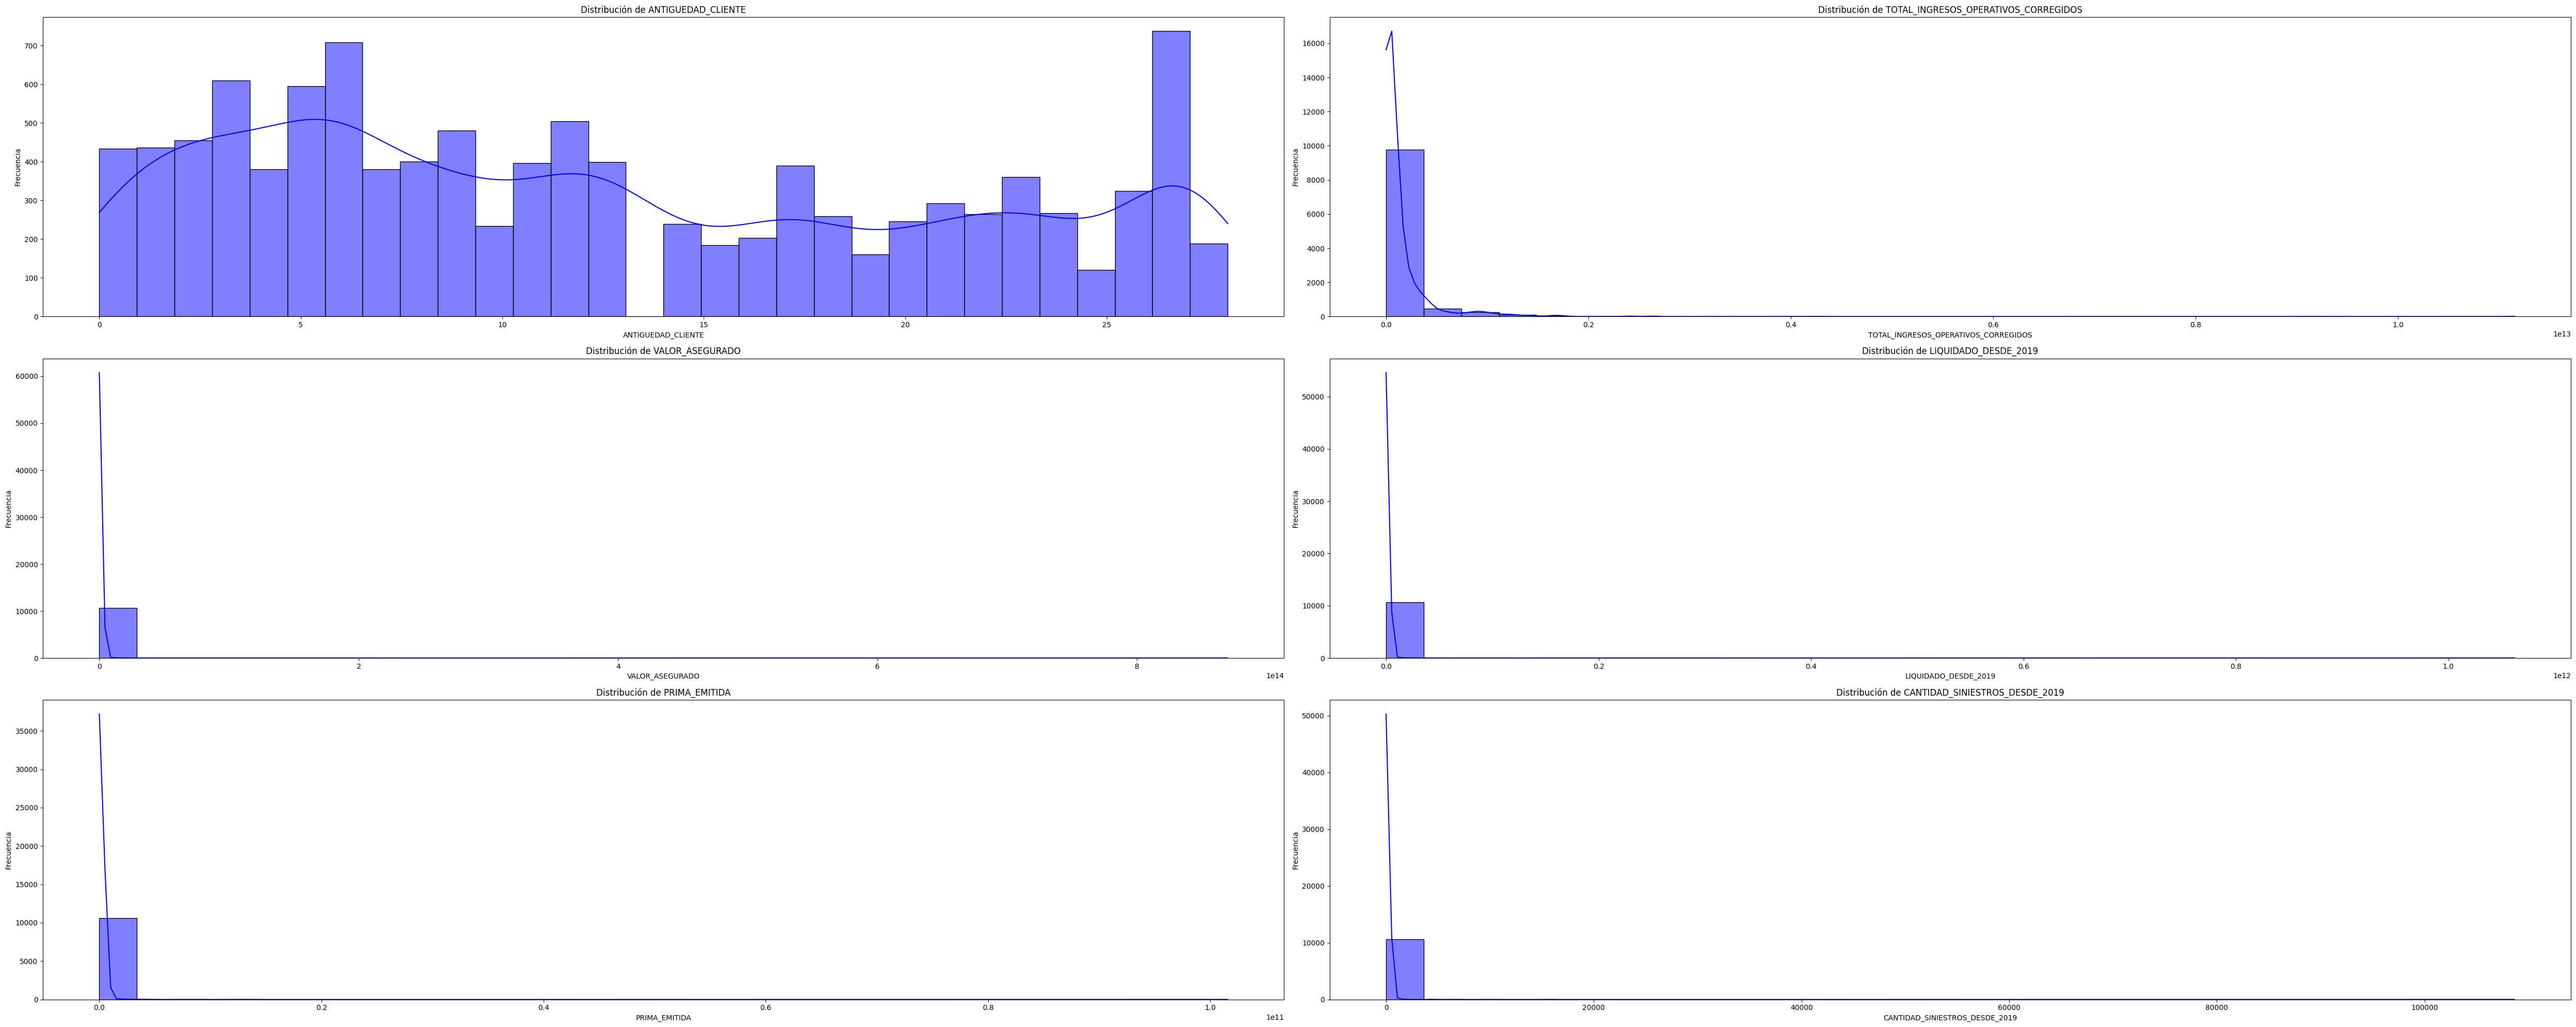

In [211]:
import matplotlib.pyplot as plt
import seaborn as sns

# Variables numéricas
numerical_cols = ['ANTIGUEDAD_CLIENTE', 'TOTAL_INGRESOS_OPERATIVOS_CORREGIDOS', 'VALOR_ASEGURADO','LIQUIDADO_DESDE_2019','PRIMA_EMITIDA','CANTIDAD_SINIESTROS_DESDE_2019']

# Crear subgráficas para cada variable
plt.figure(figsize=(50, 20))

for i, col in enumerate(numerical_cols, 1):
    plt.subplot(3, 2, i)
    sns.histplot(df2_clean[col], kde=True, bins=30, color='blue')
    plt.title(f'Distribución de {col}')
    plt.xlabel(col)
    plt.ylabel('Frecuencia')

plt.tight_layout()
plt.show()




**BASE AGREGADA**

Gráficos iniciales de la frecuencia de distribución x las diferentes variables de interés.

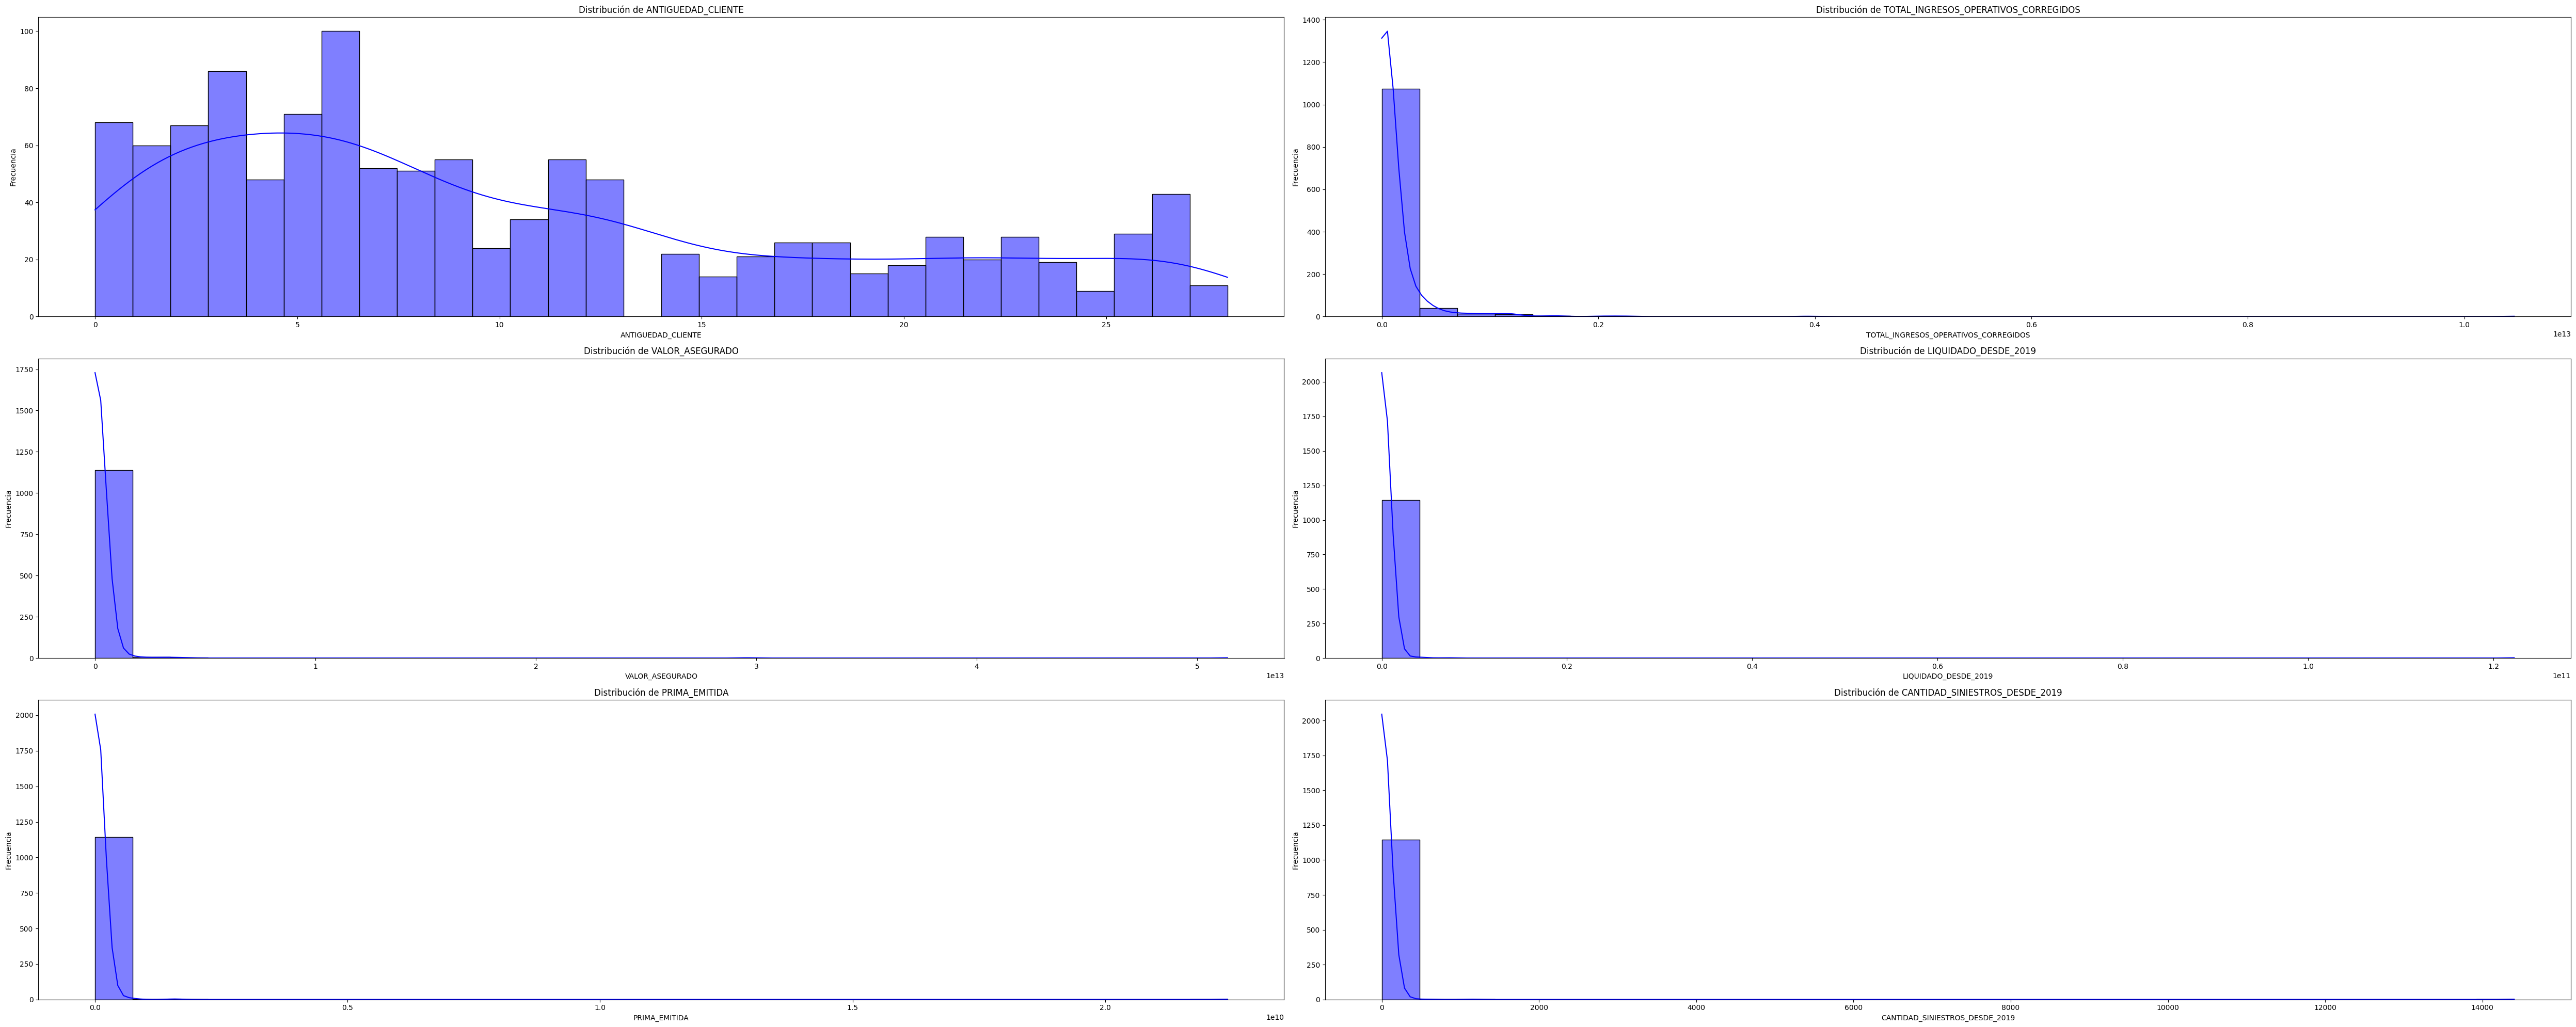

In [212]:
#EDA Base agregada

import matplotlib.pyplot as plt
import seaborn as sns

# Variables numéricas
numerical_cols = ['ANTIGUEDAD_CLIENTE', 'TOTAL_INGRESOS_OPERATIVOS_CORREGIDOS', 'VALOR_ASEGURADO','LIQUIDADO_DESDE_2019','PRIMA_EMITIDA','CANTIDAD_SINIESTROS_DESDE_2019']

# Crear subgráficas para cada variable
plt.figure(figsize=(50, 20))

for i, col in enumerate(numerical_cols, 1):
    plt.subplot(3, 2, i)
    sns.histplot(resultado_sql2[col], kde=True, bins=30, color='blue')
    plt.title(f'Distribución de {col}')
    plt.xlabel(col)
    plt.ylabel('Frecuencia')

plt.tight_layout()
plt.show()


### DEBIDO AL COMPORTAMIENTO SESGADO Y ASIMÉTRICO DE LOS DATOS, SE DECIDE REALIZAR TRANSFORMACIÓN 'LOGNORMAL0 SOBRE LAS COLUMNAS SESGADAS

**Dicha transformación es recomendada para trabajar conjuntos de datos con alta asimetría hacia la izquierda, como es este caso.**

In [213]:
import numpy as np

# Lista de columnas que podrían estar sesgadas
columnas_sesgadas = ['TOTAL_INGRESOS_OPERATIVOS_CORREGIDOS', 'VALOR_ASEGURADO', 'PRIMA_EMITIDA', 
                     'CANTIDAD_SINIESTROS_DESDE_2019', 'LIQUIDADO_DESDE_2019']

# Aplicamos la transformación logarítmica a cada columna con los ajustes correspondientes
for columna in columnas_sesgadas:
    if columna == 'CANTIDAD_SINIESTROS_DESDE_2019':
        # Aplicamos el ajuste de +0.0001 para la cantidad de siniestros
        resultado_sql2[columna + '_log'] = np.log(resultado_sql2[columna] + 1)  # Ajuste para evitar log(0)
    else:
        # Para las demás columnas, aplicamos el ajuste de +1
        resultado_sql2[columna + '_log'] = np.log(resultado_sql2[columna] + 1)  # Ajuste para evitar log(0)

# Verificación de las primeras filas después de la transformación
resultado_sql2[['TOTAL_INGRESOS_OPERATIVOS_CORREGIDOS', 'TOTAL_INGRESOS_OPERATIVOS_CORREGIDOS_log', 
                'VALOR_ASEGURADO', 'VALOR_ASEGURADO_log', 
                'CANTIDAD_SINIESTROS_DESDE_2019', 'CANTIDAD_SINIESTROS_DESDE_2019_log']].head()



,TOTAL_INGRESOS_OPERATIVOS_CORREGIDOS,TOTAL_INGRESOS_OPERATIVOS_CORREGIDOS_log,VALOR_ASEGURADO,VALOR_ASEGURADO_log,CANTIDAD_SINIESTROS_DESDE_2019,CANTIDAD_SINIESTROS_DESDE_2019_log
0,4.644423e+09,22.258933,1.610576e+10,23.502443,1.00,0.693147
1,4.534520e+10,24.537570,7.423784e+10,25.030540,64.00,4.174387
2,9.896008e+09,23.015397,5.920486e+10,24.804270,1.75,1.011601
3,1.368014e+11,25.641796,8.120277e+10,25.120215,4.00,1.609438
4,5.060908e+11,26.949982,2.513237e+11,26.250008,7.50,2.140066


Comprobamos nuevamente el comportamiento del df una vez se ha transformado

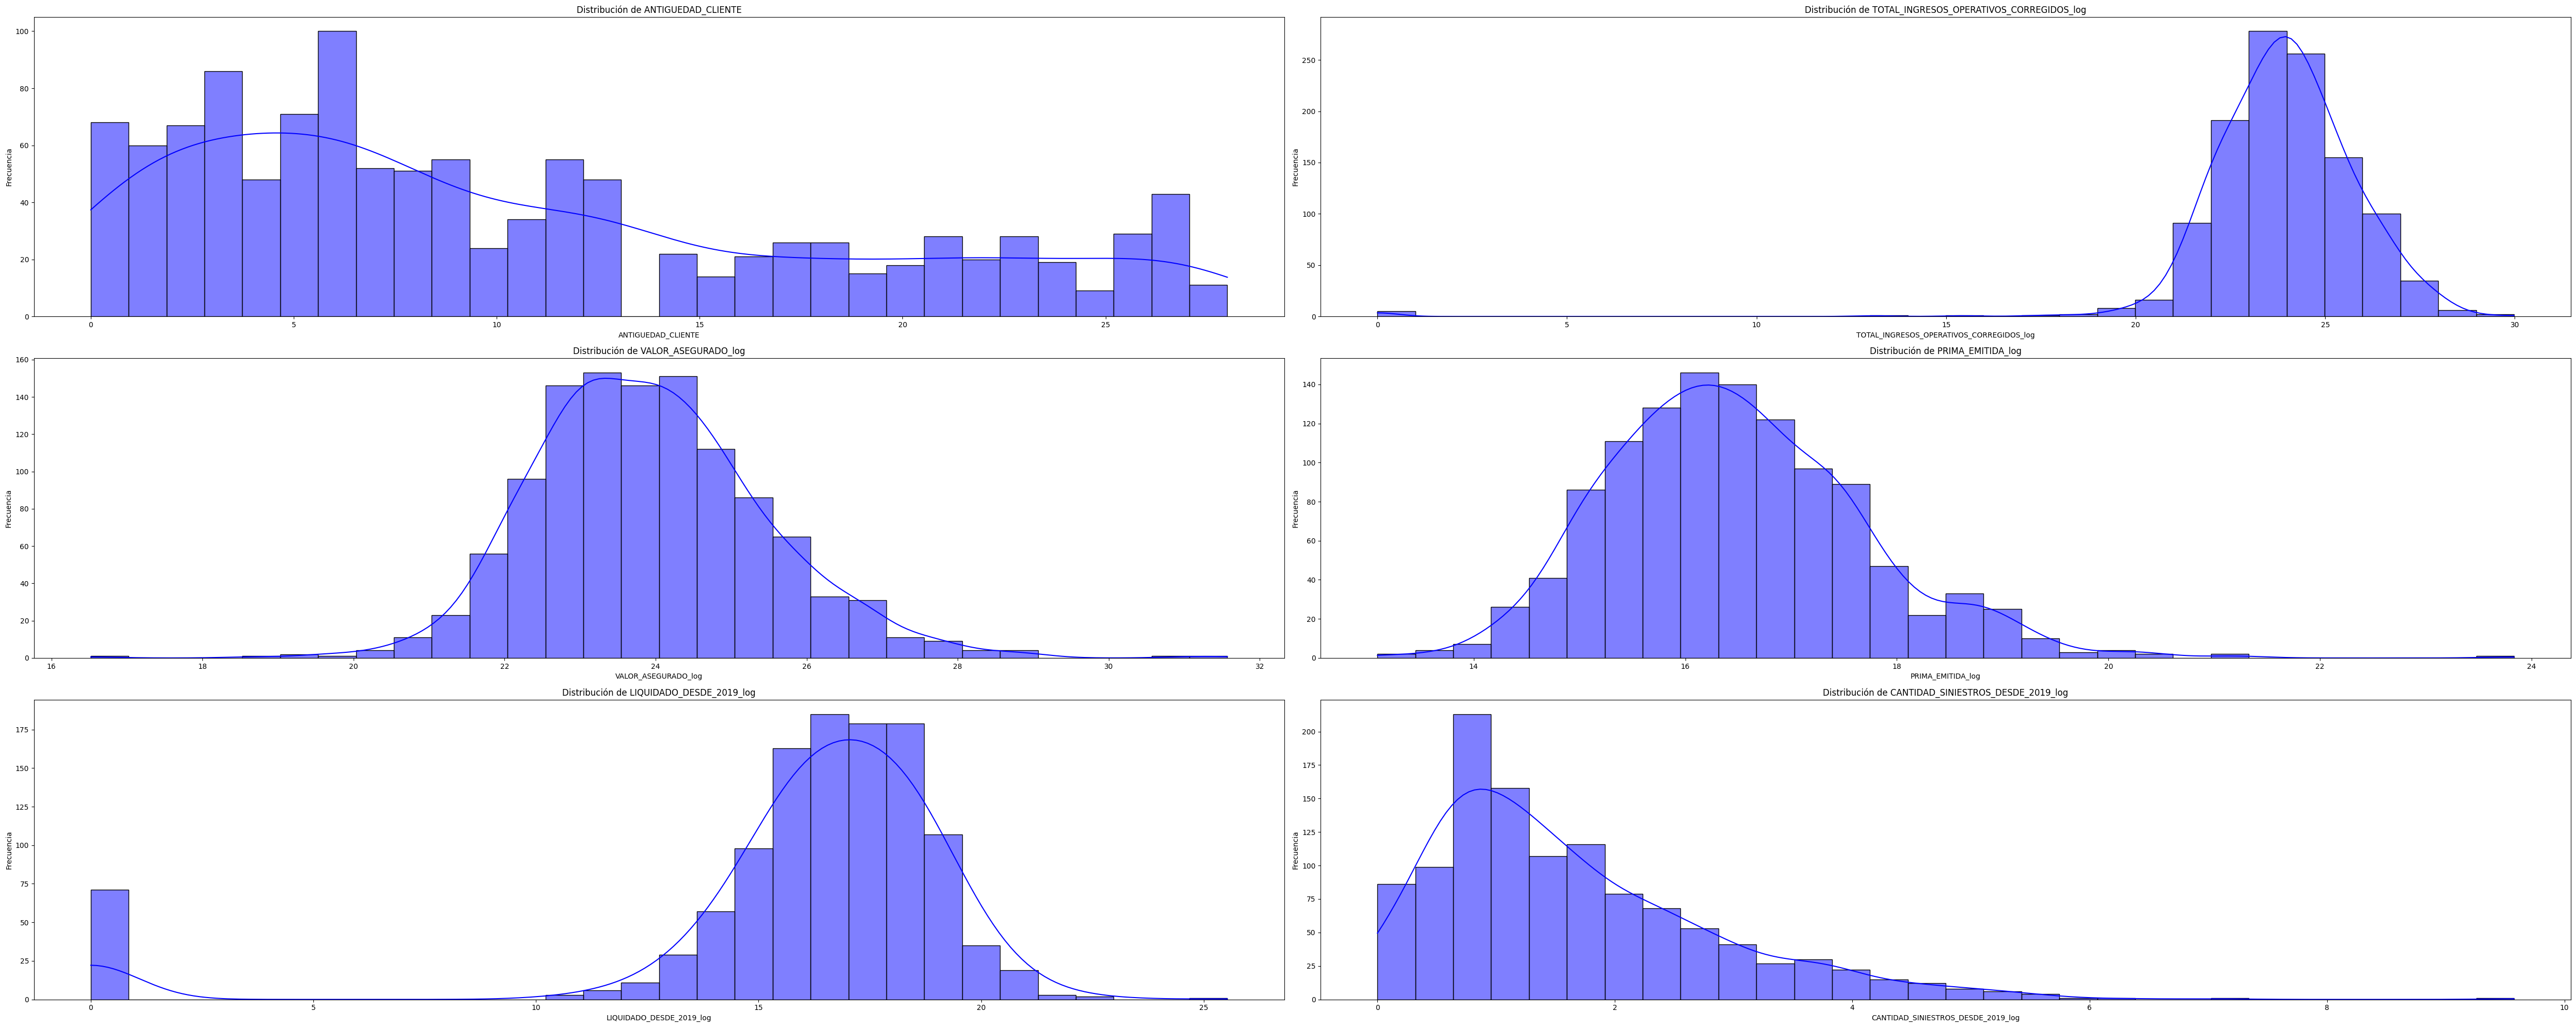

In [215]:
import matplotlib.pyplot as plt
import seaborn as sns

# Variables numéricas
numerical_cols = ['ANTIGUEDAD_CLIENTE', 'TOTAL_INGRESOS_OPERATIVOS_CORREGIDOS_log', 'VALOR_ASEGURADO_log','PRIMA_EMITIDA_log','LIQUIDADO_DESDE_2019_log','CANTIDAD_SINIESTROS_DESDE_2019_log']

# Crear subgráficas para cada variable
plt.figure(figsize=(50, 20))

for i, col in enumerate(numerical_cols, 1):
    plt.subplot(3, 2, i)
    sns.histplot(resultado_sql2[col], kde=True, bins=30, color='blue')
    plt.title(f'Distribución de {col}')
    plt.xlabel(col)
    plt.ylabel('Frecuencia')

plt.tight_layout()
plt.show()


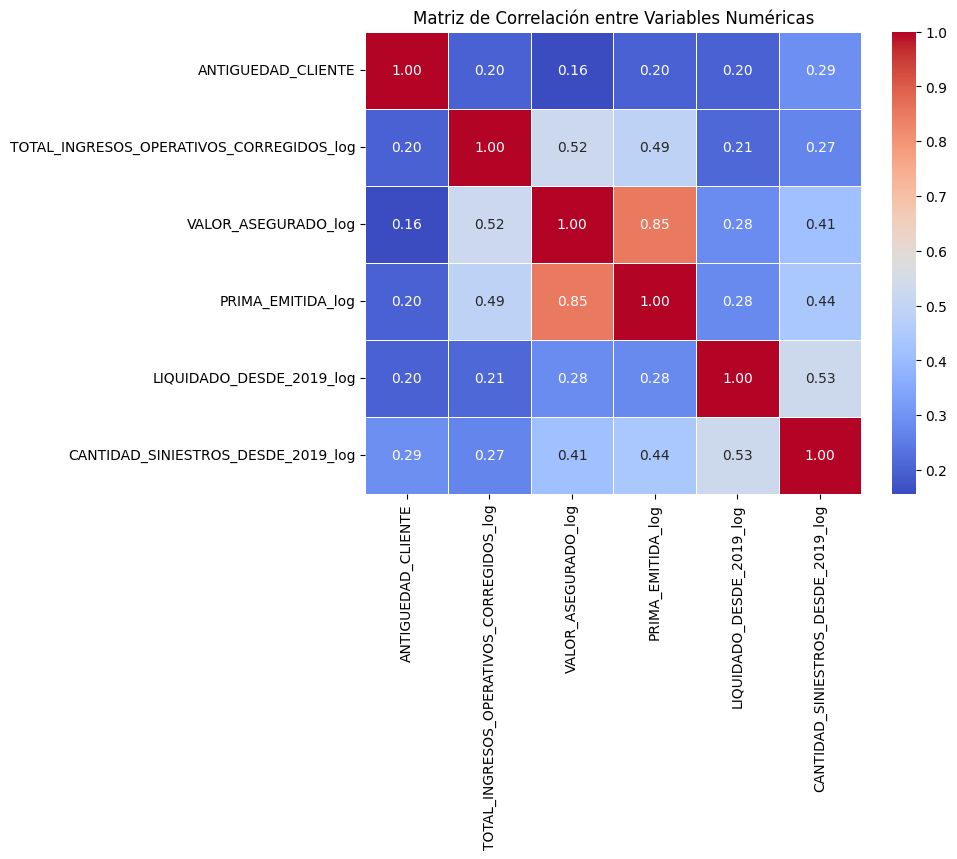

In [221]:
# Calcular la matriz de correlación
correlation_matrix2 = resultado_sql2[numerical_cols].corr()

# Crear un mapa de calor
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix2, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Matriz de Correlación entre Variables Numéricas')
plt.show()



El análisis de correlación nos confirma algunas hipótesis que se tenían al inicio. 

- Alta correlación entre 'VALOR_ASEGURADO' y 'PRIMA_EMITIDA' ya que el valor de la póliza gfeneralmente está dado por el valor del seguro. 

**COMPROBACIÓN BASE SIN TRANSFORMACIÓN vs BASE LOGNORMAL**

La transformación lognormal nos permite escalar esos valores extremadamente grandes y tener una visión general mucho más clara del comportamiento de los datos sin vernos influidos por números extensos.

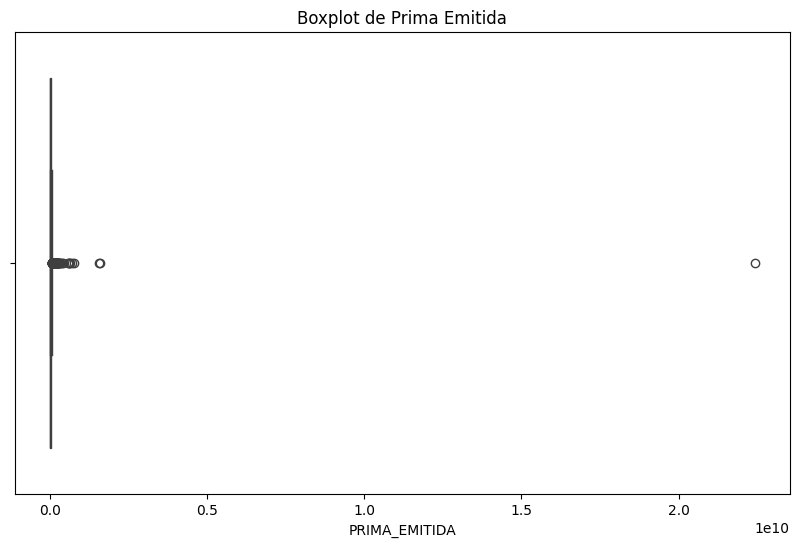

In [217]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=resultado_sql2['PRIMA_EMITIDA'])
plt.title('Boxplot de Prima Emitida')
plt.show()

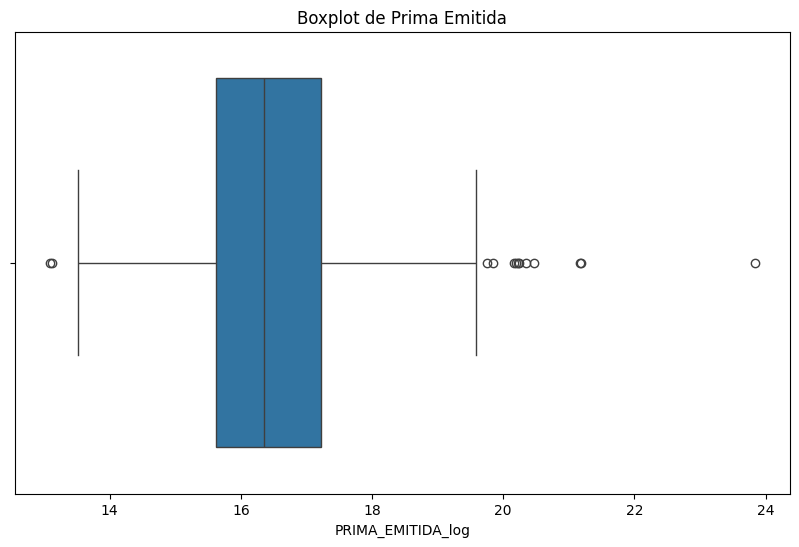

In [220]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=resultado_sql2['PRIMA_EMITIDA_log'])
plt.title('Boxplot de Prima Emitida')
plt.show()

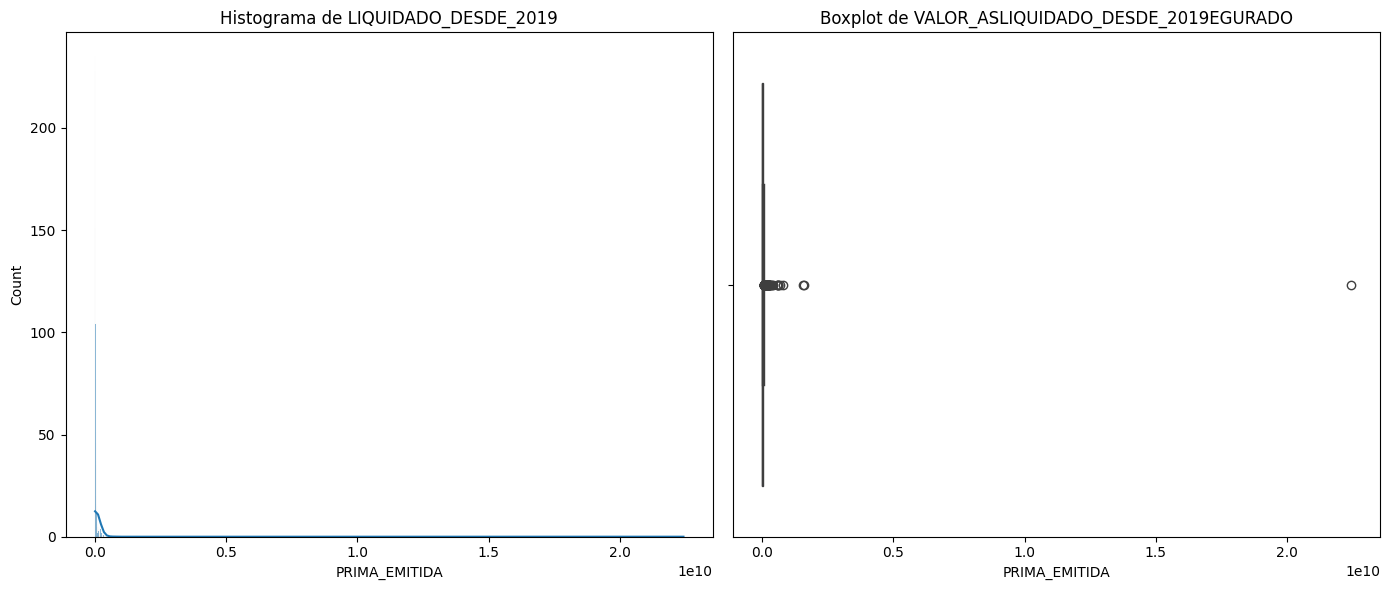

Asimetría: 32.94566812447334
Curtosis: 1101.8190382080677


In [219]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew, kurtosis

# Graficar histograma y boxplot para visualización
plt.figure(figsize=(14, 6))

# Histograma
plt.subplot(1, 2, 1)
sns.histplot(x=resultado_sql2['PRIMA_EMITIDA'], kde=True)
plt.title('Histograma de LIQUIDADO_DESDE_2019')

# Boxplot
plt.subplot(1, 2, 2)
sns.boxplot(x=resultado_sql2['PRIMA_EMITIDA'])
plt.title('Boxplot de VALOR_ASLIQUIDADO_DESDE_2019EGURADO')

plt.tight_layout()
plt.show()

# Calcular asimetría (skewness) y curtosis
asimetria = skew(resultado_sql2['PRIMA_EMITIDA'])
curtosis = kurtosis(resultado_sql2['PRIMA_EMITIDA'])

print(f"Asimetría: {asimetria}")
print(f"Curtosis: {curtosis}")


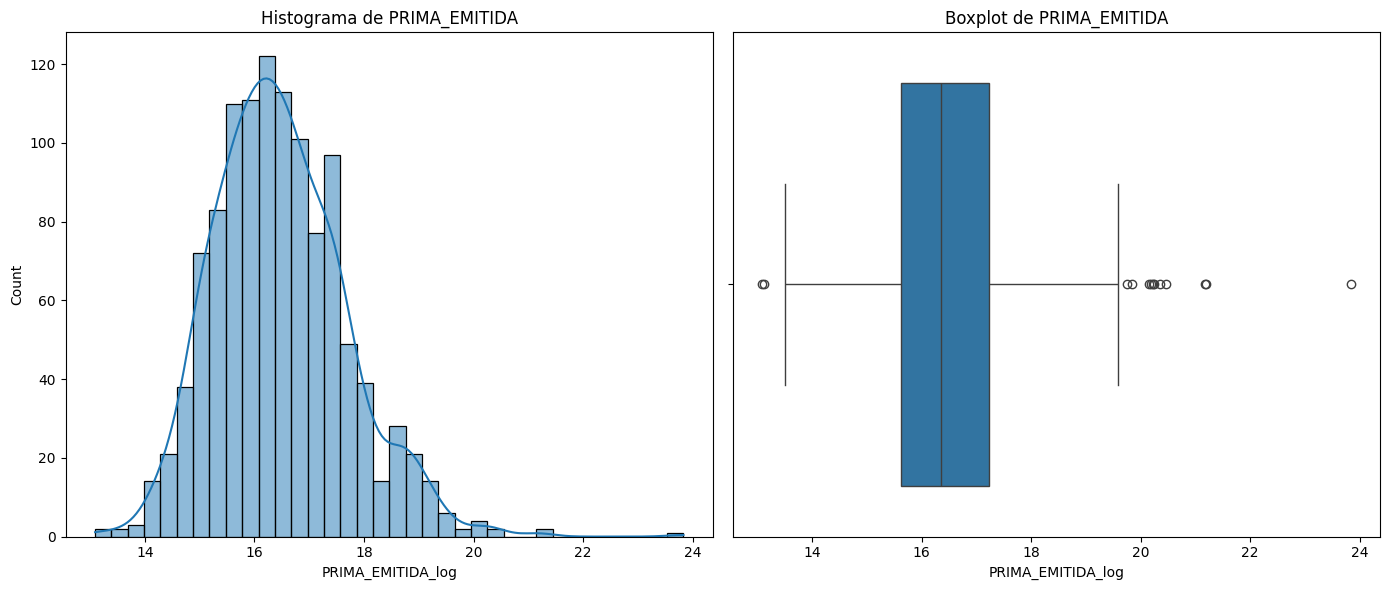

Asimetría: 0.657112769874938
Curtosis: 1.4172959751679066


In [123]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew, kurtosis

# Graficar histograma y boxplot para visualización
plt.figure(figsize=(14, 6))

# Histograma
plt.subplot(1, 2, 1)
sns.histplot(x=resultado_sql2['PRIMA_EMITIDA_log'], kde=True)
plt.title('Histograma de PRIMA_EMITIDA')

# Boxplot
plt.subplot(1, 2, 2)
sns.boxplot(x=resultado_sql2['PRIMA_EMITIDA_log'])
plt.title('Boxplot de PRIMA_EMITIDA')

plt.tight_layout()
plt.show()

# Calcular asimetría (skewness) y curtosis
asimetria = skew(resultado_sql2['PRIMA_EMITIDA_log'])
curtosis = kurtosis(resultado_sql2['PRIMA_EMITIDA_log'])

print(f"Asimetría: {asimetria}")
print(f"Curtosis: {curtosis}")


Comprobamos que la transformación trabaja bien los problemas de sesgo y asimetría

Posteriormente, realiza comprobación para todas las variables numéricas de interés, viendo mejoría en cuanto a la asimetría y sesgo

In [124]:
# Asimetría y curtosis de las columnas transformadas
for columna in columnas_sesgadas:
    print(f"Evaluación para {columna}_log:")
    print(f"Asimetría: {resultado_sql2[columna + '_log'].skew()}")
    print(f"Curtosis: {resultado_sql2[columna + '_log'].kurtosis()}")
    print("-" * 50)


Evaluación para TOTAL_INGRESOS_OPERATIVOS_CORREGIDOS_log:
Asimetría: -4.817958600094935
Curtosis: 48.07855461782277
--------------------------------------------------
Evaluación para VALOR_ASEGURADO_log:
Asimetría: 0.38963778248799513
Curtosis: 1.3136485594671954
--------------------------------------------------
Evaluación para PRIMA_EMITIDA_log:
Asimetría: 0.6579728026619338
Curtosis: 1.428733028160765
--------------------------------------------------
Evaluación para CANTIDAD_SINIESTROS_DESDE_2019_log:
Asimetría: 1.2901861384125004
Curtosis: 2.494235827746302
--------------------------------------------------
Evaluación para LIQUIDADO_DESDE_2019_log:
Asimetría: -2.683935815656015
Curtosis: 7.147074086441673
--------------------------------------------------


**ALGUNAS GRÁFICAS DESCRIPTIVAS PARA ENTENDER LAS VARIABLES CATEGÓRICAS**

**Distribución x ciudad**

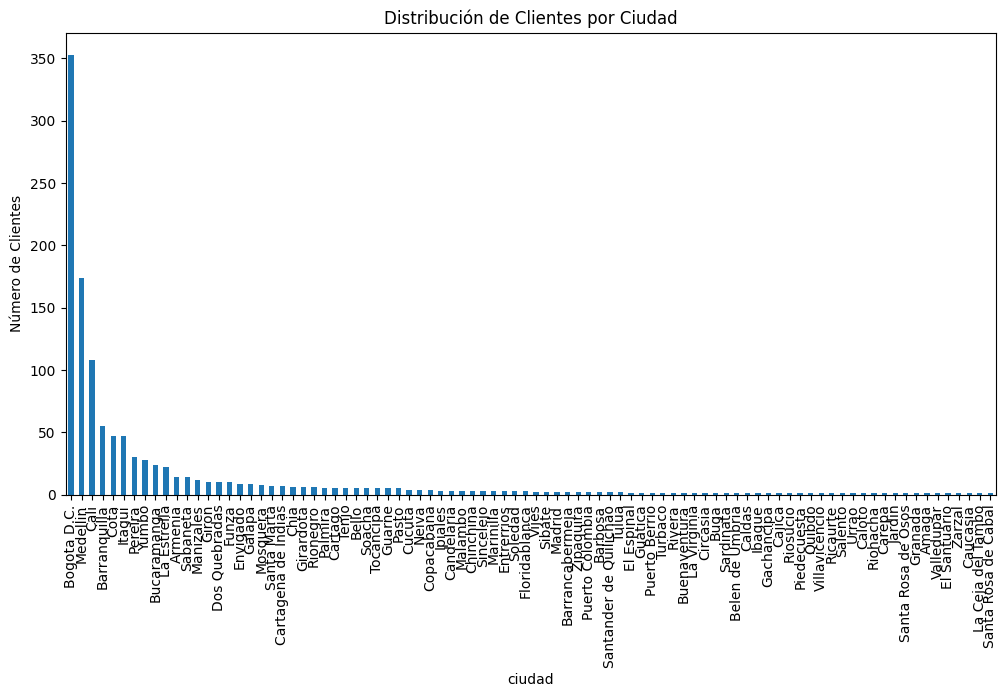

In [125]:
plt.figure(figsize=(12, 6))
resultado_sql2['ciudad'].value_counts().plot(kind='bar')
plt.title('Distribución de Clientes por Ciudad')
plt.ylabel('Número de Clientes')
plt.show()


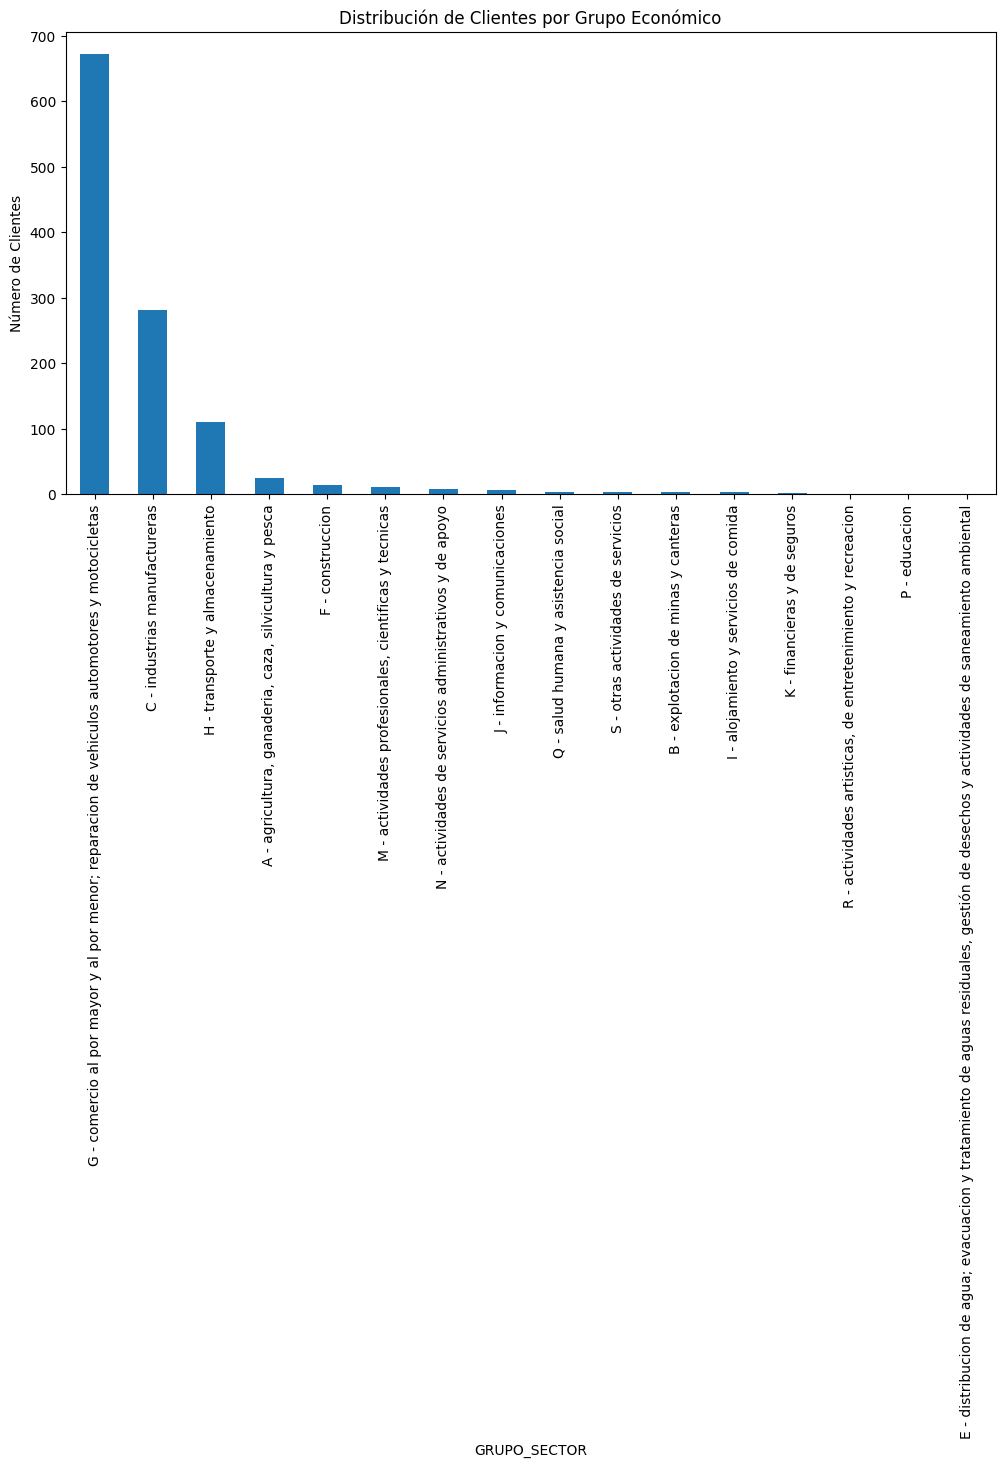

In [126]:
plt.figure(figsize=(12, 6))
resultado_sql2['GRUPO_SECTOR'].value_counts().plot(kind='bar')
plt.title('Distribución de Clientes por Grupo Económico')
plt.ylabel('Número de Clientes')
plt.show()


## PROPUESTA DE DISTRIBUCIÓN DE RELACIONAMIENTO

La propuesta va a estar basada en tres variables principales junto a la aplicación de los dos bonuses, con el fin de que alimenten el modelo.

Las variables de interés serán:

- Valor_Asegurado
- Prima_Emitida
- Liquidado_desde_2019
- Cantidad_Siniestros
- Antiguedad Cliente

El proceso a seguir para la propuesta será el siguiente:

- Clusterización inicial de clientes (según las variables de interés)
- Clasificación en etiquetas (Atencion personalizada o masiva) del cliente según su cluster
- Propuesta de clasificación adaptada a las necesidades 


**CLUSTERIZACIÓN INICIAL**

Se va a crear una columna antes de iniciar con el proceso que identificará el número de productos únicos que hay x cliente

In [127]:
# Agrupar por ID y contar los NOMBRE_RAMO_EMISION únicos asociados
conteo_productos = resultado_sql_base_productos.groupby('ID')['NOMBRE_RAMO_EMISION'].nunique().reset_index()

# Renombrar columna
conteo_productos.columns = ['ID', 'num_productos']

# Ver el resultado
print(conteo_productos.head())
print(f"Total de IDs únicos: {conteo_productos.shape[0]}")


         ID  num_productos
0  111901.0              2
1  111909.0              2
2  112213.0              4
3  112408.0              6
4  115210.0              6
Total de IDs únicos: 1148


In [128]:
id_especifico = 336194  # Cambia esto por el ID que quieras revisar

productos_id = resultado_sql_base_productos[resultado_sql_base_productos['ID'] == id_especifico]
conteo_unico = productos_id['NOMBRE_RAMO_EMISION'].nunique()

print(f"El ID {id_especifico} tiene {conteo_unico} productos únicos (NOMBRE_RAMO_EMISION).")


El ID 336194 tiene 22 productos únicos (NOMBRE_RAMO_EMISION).


In [129]:
# Unir al DataFrame principal si lo necesitas
resultado_sql_base_productos = resultado_sql_base_productos.merge(conteo_productos, on='ID', how='left')


In [130]:
resultado_sql_base_productos

,ID,ciudad,region,GRUPO_SECTOR,ANO_CONSTITUCION,ANTIGUEDAD_CLIENTE,VALOR_ASEGURADO,PRIMA_EMITIDA,TOTAL_INGRESOS_OPERATIVOS_CORREGIDOS,NOMBRE_RAMO_EMISION,CODIGO_RAMO_EMISION,CANTIDAD_SINIESTROS_DESDE_2019,LIQUIDADO_DESDE_2019,num_productos
0,111901.0,Cali,Valle del Cauca,G - comercio al por mayor y al por menor; repa...,2005.0,3.0,1.748899e+10,11030693.0,4.644423e+09,PRODUCTO 16,66.0,0.0,0.0,2
1,111901.0,Cali,Valle del Cauca,G - comercio al por mayor y al por menor; repa...,2005.0,3.0,1.472254e+10,11650146.0,4.644423e+09,PRODUCTO 24,15.0,2.0,1915714.0,2
2,111909.0,Bucaramanga,Santander,C - industrias manufactureras,1994.0,18.0,7.236728e+09,0.0,4.534520e+10,PRODUCTO 2,70.0,119.0,590590896.0,2
3,111909.0,Bucaramanga,Santander,C - industrias manufactureras,1994.0,18.0,1.412390e+11,26894382.0,4.534520e+10,PRODUCTO 24,15.0,9.0,181285852.0,2
4,112213.0,Puerto Berrio,Antioquia,C - industrias manufactureras,2015.0,5.0,6.961125e+10,44726790.0,9.896008e+09,PRODUCTO 14,5.0,4.0,54441510.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3674,999402.0,Bogota D.C.,Bogota D.C,G - comercio al por mayor y al por menor; repa...,1978.0,12.0,8.521800e+09,7601197.0,1.515440e+10,PRODUCTO 4,1.0,6.0,94380397.0,4
3675,999850.0,Santa Marta,Magdalena,H - transporte y almacenamiento,2012.0,2.0,2.500000e+07,1155000.0,1.139401e+10,PRODUCTO 15,7.0,0.0,0.0,4
3676,999850.0,Santa Marta,Magdalena,H - transporte y almacenamiento,2012.0,2.0,8.700000e+09,2165622.0,1.139401e+10,PRODUCTO 17,10.0,0.0,0.0,4
3677,999850.0,Santa Marta,Magdalena,H - transporte y almacenamiento,2012.0,2.0,0.000000e+00,14151200.0,1.139401e+10,PRODUCTO 21,310.0,0.0,0.0,4


In [131]:
#resultado_sql_base_productos.to_excel("base_agregada_por_producto.xlxs",index=False)

In [132]:
resultado_sql_base_productos

,ID,ciudad,region,GRUPO_SECTOR,ANO_CONSTITUCION,ANTIGUEDAD_CLIENTE,VALOR_ASEGURADO,PRIMA_EMITIDA,TOTAL_INGRESOS_OPERATIVOS_CORREGIDOS,NOMBRE_RAMO_EMISION,CODIGO_RAMO_EMISION,CANTIDAD_SINIESTROS_DESDE_2019,LIQUIDADO_DESDE_2019,num_productos
0,111901.0,Cali,Valle del Cauca,G - comercio al por mayor y al por menor; repa...,2005.0,3.0,1.748899e+10,11030693.0,4.644423e+09,PRODUCTO 16,66.0,0.0,0.0,2
1,111901.0,Cali,Valle del Cauca,G - comercio al por mayor y al por menor; repa...,2005.0,3.0,1.472254e+10,11650146.0,4.644423e+09,PRODUCTO 24,15.0,2.0,1915714.0,2
2,111909.0,Bucaramanga,Santander,C - industrias manufactureras,1994.0,18.0,7.236728e+09,0.0,4.534520e+10,PRODUCTO 2,70.0,119.0,590590896.0,2
3,111909.0,Bucaramanga,Santander,C - industrias manufactureras,1994.0,18.0,1.412390e+11,26894382.0,4.534520e+10,PRODUCTO 24,15.0,9.0,181285852.0,2
4,112213.0,Puerto Berrio,Antioquia,C - industrias manufactureras,2015.0,5.0,6.961125e+10,44726790.0,9.896008e+09,PRODUCTO 14,5.0,4.0,54441510.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3674,999402.0,Bogota D.C.,Bogota D.C,G - comercio al por mayor y al por menor; repa...,1978.0,12.0,8.521800e+09,7601197.0,1.515440e+10,PRODUCTO 4,1.0,6.0,94380397.0,4
3675,999850.0,Santa Marta,Magdalena,H - transporte y almacenamiento,2012.0,2.0,2.500000e+07,1155000.0,1.139401e+10,PRODUCTO 15,7.0,0.0,0.0,4
3676,999850.0,Santa Marta,Magdalena,H - transporte y almacenamiento,2012.0,2.0,8.700000e+09,2165622.0,1.139401e+10,PRODUCTO 17,10.0,0.0,0.0,4
3677,999850.0,Santa Marta,Magdalena,H - transporte y almacenamiento,2012.0,2.0,0.000000e+00,14151200.0,1.139401e+10,PRODUCTO 21,310.0,0.0,0.0,4


In [133]:
# 1. Agrupar por ID y calcular el máximo de num_productos
productos_max = resultado_sql_base_productos.groupby('ID')['num_productos'].max().reset_index()

# 2. Renombrar la columna para evitar conflictos
productos_max.rename(columns={'num_productos': 'max_num_productos'}, inplace=True)

# 3. Hacer merge con resultado_sql2 por la columna ID
resultado_sql2 = resultado_sql2.merge(productos_max, on='ID', how='left')


In [134]:
resultado_sql2['num_productos'] = resultado_sql2['ID'].map(productos_max.set_index('ID')['max_num_productos'])


In [135]:
resultado_sql2.to_excel("prueba123.xlsx",index=False)

Para el proceso de clusterización se decidió trabajar con el algoritmo de aprendizaje no supervisado Kmeans. 

Las razones que me llevaron a elegir ese modelo son las siguientes:

- No existen etiquetas previas que indiquen qué clientes deberían recibir atención personalizada vs. masiva (problema no supervisado).

- K-Means es eficiente y escalable para grandes volúmenes de datos según la literatura.

- Es un modelo que ermite identificar patrones naturales de agrupación basados en variables numéricas clave (clave en nuestro ejercicio).



El primer paso para que el algoritmo funcione es que sus variables numéricas clave estén normalizadas, lo cual se hará a continuación:

In [136]:
resultado_sql2

,ID,ciudad,region,GRUPO_SECTOR,ANO_CONSTITUCION,ANTIGUEDAD_CLIENTE,VALOR_ASEGURADO,PRIMA_EMITIDA,TOTAL_INGRESOS_OPERATIVOS_CORREGIDOS,CODIGO_RAMO_EMISION,CANTIDAD_SINIESTROS_DESDE_2019,LIQUIDADO_DESDE_2019,TOTAL_INGRESOS_OPERATIVOS_CORREGIDOS_log,VALOR_ASEGURADO_log,PRIMA_EMITIDA_log,CANTIDAD_SINIESTROS_DESDE_2019_log,LIQUIDADO_DESDE_2019_log,max_num_productos,num_productos
0,111901.0,Cali,Valle del Cauca,G - comercio al por mayor y al por menor; repa...,2005.0,3.0,1.610576e+10,1.134042e+07,4.644423e+09,66.0,1.00,9.578570e+05,22.258933,23.502443,16.243884,0.693147,13.772455,2,2
1,111909.0,Bucaramanga,Santander,C - industrias manufactureras,1994.0,18.0,7.423784e+10,1.344719e+07,4.534520e+10,70.0,64.00,3.859384e+08,24.537570,25.030540,16.414281,4.174387,19.771188,2,2
2,112213.0,Puerto Berrio,Antioquia,C - industrias manufactureras,2015.0,5.0,5.920486e+10,2.177590e+07,9.896008e+09,4.0,1.75,2.086632e+07,23.015397,24.804270,16.896314,1.011601,16.853647,4,4
3,112408.0,Yumbo,Valle del Cauca,G - comercio al por mayor y al por menor; repa...,2008.0,5.0,8.120277e+10,4.029395e+07,1.368014e+11,1.0,4.00,6.575359e+07,25.641796,25.120215,17.511712,1.609438,18.001425,6,6
4,115210.0,Bogota D.C.,Bogota D.C,G - comercio al por mayor y al por menor; repa...,2009.0,6.0,2.513237e+11,2.034452e+08,5.060908e+11,70.0,7.50,2.310916e+07,26.949982,26.250008,19.130907,2.140066,16.955740,6,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1143,998158.0,Cali,Valle del Cauca,C - industrias manufactureras,2005.0,2.0,3.840000e+10,9.070000e+06,1.629423e+10,15.0,2.00,9.593798e+06,23.514077,24.371323,16.020483,1.098612,16.076628,1,1
1144,998472.0,Bogota D.C.,Bogota D.C,G - comercio al por mayor y al por menor; repa...,2009.0,9.0,4.263525e+09,4.302386e+06,4.647091e+09,1.0,0.25,8.494140e+05,22.259507,22.173362,15.274680,0.223144,13.652303,4,4
1145,999204.0,Medellin,Antioquia,G - comercio al por mayor y al por menor; repa...,1996.0,11.0,4.291209e+09,4.054791e+06,5.215123e+09,1.0,2.50,1.781798e+07,22.374829,22.179834,15.215410,1.252763,16.695719,4,4
1146,999402.0,Bogota D.C.,Bogota D.C,G - comercio al por mayor y al por menor; repa...,1978.0,12.0,1.069365e+10,9.142559e+06,1.515440e+10,70.0,4.75,3.780985e+07,23.441557,23.092916,16.028451,1.749200,17.448080,4,4


In [137]:
# Usar solo las columnas lognormales transformadas (con el sufijo '_log')
resultado_sql2_transformed = resultado_sql2[['ANTIGUEDAD_CLIENTE', 'TOTAL_INGRESOS_OPERATIVOS_CORREGIDOS_log', 'VALOR_ASEGURADO_log', 
                                             'LIQUIDADO_DESDE_2019_log', 'PRIMA_EMITIDA_log', 'CANTIDAD_SINIESTROS_DESDE_2019_log']]


Obtención de las columnas normalizadas

In [138]:
from sklearn.preprocessing import StandardScaler
# Aplicar la normalización con StandardScaler
scaler = StandardScaler()
resultado_sql2_scaled = scaler.fit_transform(resultado_sql2_transformed)

# Convertir el resultado a un DataFrame para mayor claridad
resultado_sql2_scaled_df = pd.DataFrame(resultado_sql2_scaled, columns=resultado_sql2_transformed.columns)


# Ver las primeras filas del DataFrame escalado
resultado_sql2_scaled_df.head()

,ANTIGUEDAD_CLIENTE,TOTAL_INGRESOS_OPERATIVOS_CORREGIDOS_log,VALOR_ASEGURADO_log,LIQUIDADO_DESDE_2019_log,PRIMA_EMITIDA_log,CANTIDAD_SINIESTROS_DESDE_2019_log
0,-0.899904,-0.693266,-0.272416,-0.467388,-0.188845,-0.780764
1,0.966002,0.292552,0.719415,0.880905,-0.047465,2.128303
2,-0.651116,-0.365993,0.572552,0.225150,0.352483,-0.514651
3,-0.651116,0.770278,0.777620,0.483128,0.863084,-0.015074
4,-0.526723,1.336245,1.510926,0.248097,2.206546,0.428341


Entrenamos el modelo Kmeans de la librería scikit-learn. Se asumen inicialmente 2 clusters pero se probaron con más para ver el comportamiento, finalmente se decide mantener dos.

In [139]:
from sklearn.cluster import KMeans

# Ejecutar KMeans 100 veces con diferentes inicializaciones y quedarse con la mejor
kmeans = KMeans(
    n_clusters=2,
    random_state=42,  # Semilla fija para reproducibilidad
    n_init=300,       # Repite el algoritmo 100 veces con diferentes centros
    max_iter=1000
)

# Entrenar el modelo y asignar los clusters
clusters = kmeans.fit_predict(resultado_sql2_scaled_df)

# Añadir los clusters al dataframe escalado
resultado_sql2_scaled_df['Cluster'] = clusters

# También guardar las etiquetas en el dataframe original
resultado_sql2['Cluster'] = clusters


**Cantidad de clientes x cluster:**

In [140]:
clientes_por_cluster = resultado_sql2['Cluster'].value_counts().sort_index()
print(clientes_por_cluster)



Cluster
0    679
1    469
Name: count, dtype: int64


Ya sabiendo cuantos clientes hay por cluster  se puede saber el valor promedio de la variable x cluster

In [141]:
resumen_cluster = resultado_sql2.groupby('Cluster')[[
    'ANTIGUEDAD_CLIENTE',
    'VALOR_ASEGURADO_log',
    'LIQUIDADO_DESDE_2019_log',
    'PRIMA_EMITIDA_log',
    'TOTAL_INGRESOS_OPERATIVOS_CORREGIDOS_log'
]].mean().round(2)

print(resumen_cluster)


         ANTIGUEDAD_CLIENTE  VALOR_ASEGURADO_log  LIQUIDADO_DESDE_2019_log  \
Cluster                                                                      
0                      7.91                23.05                     14.36   
1                     13.60                25.18                     18.01   

         PRIMA_EMITIDA_log  TOTAL_INGRESOS_OPERATIVOS_CORREGIDOS_log  
Cluster                                                               
0                    15.79                                     22.94  
1                    17.46                                     25.20  


**Después de aplicar el algoritmo K-Means, se asigna un número de cluster a cada cliente, pero este clustering ocurre en un espacio de múltiples dimensiones (5 dimensiones ya que son 5 variables.). 

Esto hace que sea muy difícil visualizar cómo están distribuidos realmente los grupos formados por K-Means.

Para facilitar su comprensión usamos la metodología PCA.

**PCA (Principal Component Analysis)**

Es una técnica de reducción de dimensionalidad.

Resume la información más relevante del conjunto de datos en un menor número de variables (componentes principales).

En este caso trabajaremos dos componentes para verlo en un gráfico 2D.

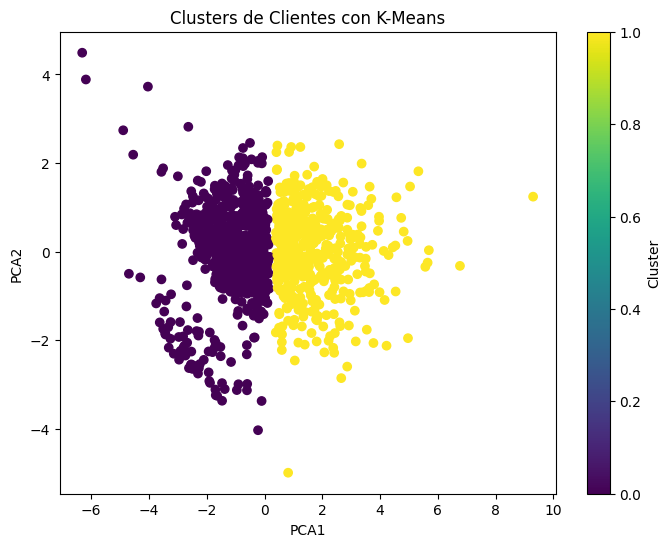

In [142]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt


# Reducir la dimensionalidad a 2 componentes principales con PCA
pca = PCA(n_components=2)
pca_components = pca.fit_transform(resultado_sql2_scaled_df)

# Crear un DataFrame con las componentes PCA y los clusters
pca_df = pd.DataFrame(data=pca_components, columns=['PCA1', 'PCA2'])
pca_df['Cluster'] = clusters

# Graficar los clusters
plt.figure(figsize=(8, 6))
plt.scatter(pca_df['PCA1'], pca_df['PCA2'], c=pca_df['Cluster'], cmap='viridis')
plt.title('Clusters de Clientes con K-Means')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.colorbar(label='Cluster')
plt.show()



**Y así quedarían definidos los dos clústeres**

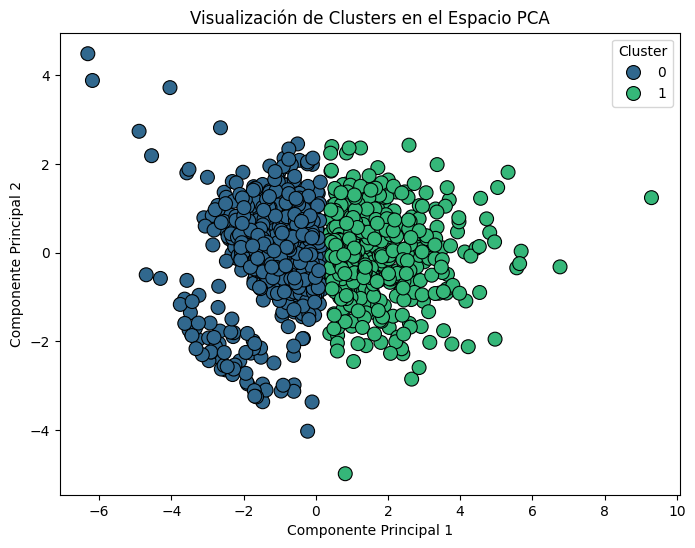

In [143]:
# Crear un DataFrame con las componentes PCA y los clusters
pca_df = pd.DataFrame(data=pca_components, columns=['PCA1', 'PCA2'])
pca_df['Cluster'] = clusters

# Graficar los clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(data=pca_df, x='PCA1', y='PCA2', hue='Cluster', palette='viridis', s=100, edgecolor='black', marker='o')
plt.title('Visualización de Clusters en el Espacio PCA')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.legend(title='Cluster', loc='upper right')
plt.show()


Sin embargo, desconocemos la naturaleza de los clusters (y el impacto sobre nuestras variables de interés)

Por tal motivo vamos a ver el análisis numérico por cluster.

In [144]:
# Seleccionar solo las columnas numéricas del DataFrame
numerical_cols = resultado_sql2_scaled_df.select_dtypes(include=['float64', 'int32']).columns

# Calcular la media por cluster usando solo las columnas numéricas
cluster_analysis = resultado_sql2_scaled_df[numerical_cols].groupby('Cluster').mean()
cluster_analysis


,ANTIGUEDAD_CLIENTE,TOTAL_INGRESOS_OPERATIVOS_CORREGIDOS_log,VALOR_ASEGURADO_log,LIQUIDADO_DESDE_2019_log,PRIMA_EMITIDA_log,CANTIDAD_SINIESTROS_DESDE_2019_log
Cluster,,,,,,
0,-0.289477,-0.39961,-0.563035,-0.335552,-0.565979,-0.468116
1,0.419094,0.57854,0.815140,0.485799,0.819403,0.677720


Se observa un comportamiento claro, las variables del 'Cluster 1' se encuentran todas por debajo del promedio, caso contrario al de 'Cluster 0'.

Por tal motivo la asignación que se hace es 'Cluster 0' **Atención personalizada** y 'Cluster 1' **Atención Masiva**

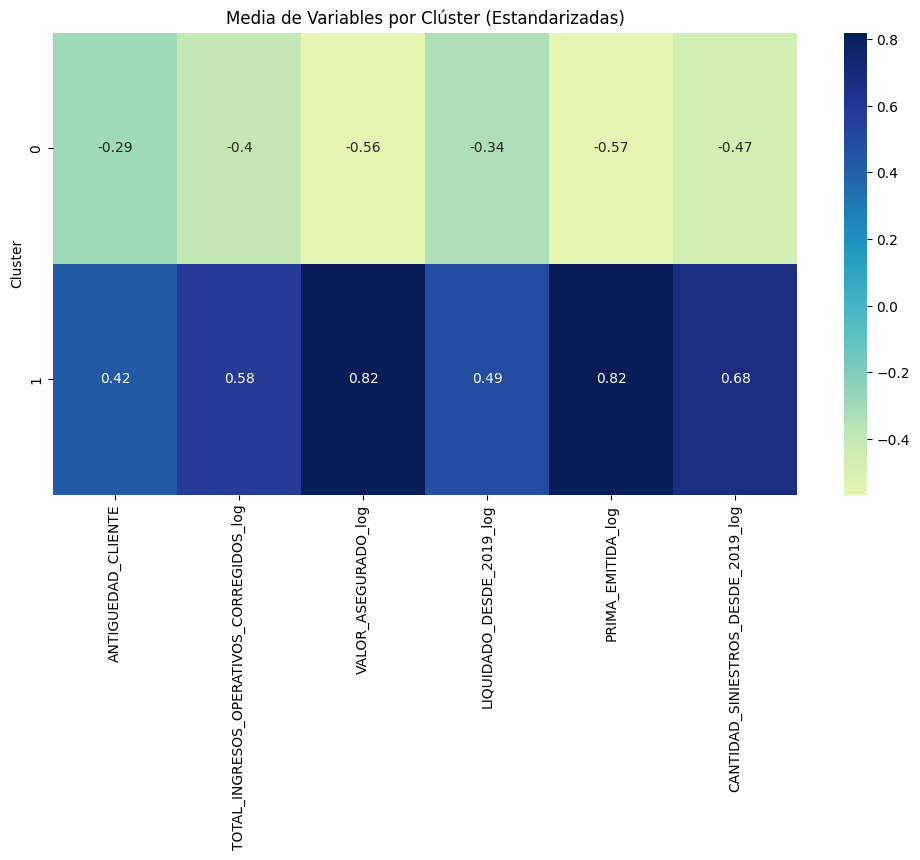

In [145]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
sns.heatmap(cluster_analysis, annot=True, cmap='YlGnBu', center=0)
plt.title('Media de Variables por Clúster (Estandarizadas)')
plt.show()


Entrenamos un modelo basado en una pequeña muestra de los datos para ver qué tal se comporta clasificando clusters.

Vemos comportamiento aceptable y estadísticos con valores para aceptar el modelo.

In [170]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Definir las características (X) y la etiqueta (y)
X = resultado_sql2[['CANTIDAD_SINIESTROS_DESDE_2019_log', 'VALOR_ASEGURADO_log','PRIMA_EMITIDA_log', 'TOTAL_INGRESOS_OPERATIVOS_CORREGIDOS_log','ANTIGUEDAD_CLIENTE']]
y = resultado_sql2['Cluster']  # Asumimos que 'Cluster' tiene la etiqueta de atención personalizada

# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Modelo de clasificación
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

# Predicciones y evaluación
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.96      0.95      0.95       131
           1       0.93      0.95      0.94        99

    accuracy                           0.95       230
   macro avg       0.95      0.95      0.95       230
weighted avg       0.95      0.95      0.95       230



### PROPUESTA DE DISTRIBUCIÓN CLIENTES PRODUCTO 24

**La propuesta de distribución sigue una lógica numérica donde se definen los dos tipos de relacionamiento según los clústeres presentados por el algoritmo**

**Cluster 1:** *Atención Personalizada:* 

- Son clientes con años de antiguedad mayores que el promedio.
- Son clientes que tienen VALOR_ASEGURADO un 0.43 mayor que el promedio.
- Son clientes con alto índice de siniestralidad (Valores altos de liquidación y Alta cantidad de siniestros)


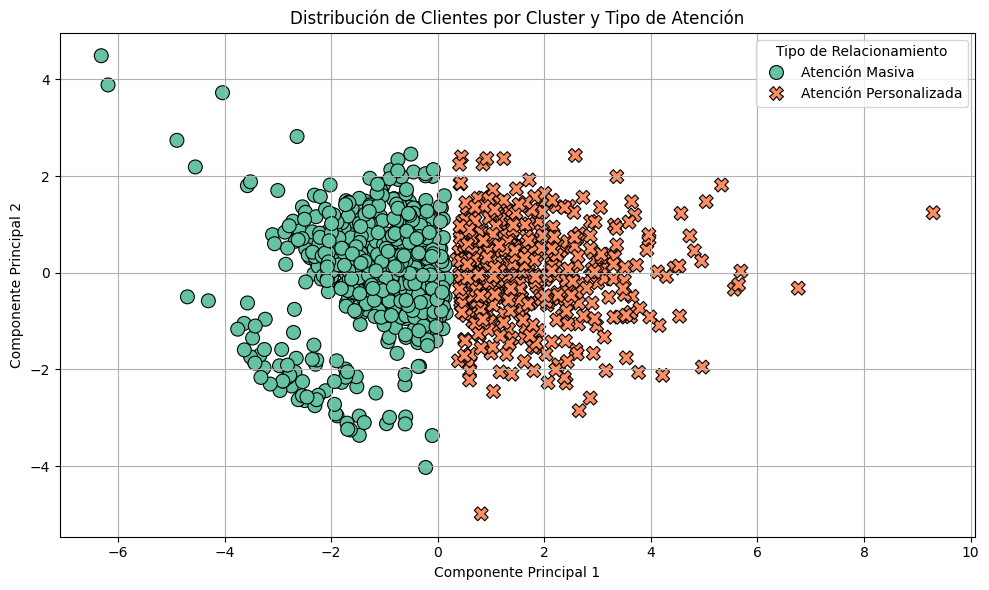

In [171]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Crear un DataFrame de ejemplo con las etiquetas de recomendación por cluster
pca_df['Recomendacion'] = pca_df['Cluster'].map({
    0: 'Atención Masiva',
    1: 'Atención Personalizada'
})

# Visualización de clusters en el espacio PCA con etiquetas
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=pca_df,
    x='PCA1', y='PCA2',
    hue='Recomendacion',
    style='Recomendacion',
    palette='Set2',
    s=100,
    edgecolor='black'
)
plt.title('Distribución de Clientes por Cluster y Tipo de Atención')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.legend(title='Tipo de Relacionamiento')
plt.grid(True)
plt.tight_layout()
plt.show()


In [172]:
# Agregar la recomendación al resumen por cluster
cluster_analysis_with_rec = cluster_analysis.copy()
cluster_analysis_with_rec['Recomendacion'] = ['Atención Masiva', 'Atención Personalizada']

# Reordenar columnas para claridad
cols = ['Recomendacion'] + [col for col in cluster_analysis_with_rec.columns if col != 'Recomendacion']
cluster_analysis_with_rec = cluster_analysis_with_rec[cols]

# Mostrar tabla
print(cluster_analysis_with_rec.round(2))


                  Recomendacion  ANTIGUEDAD_CLIENTE  \
Cluster                                               
0               Atención Masiva               -0.29   
1        Atención Personalizada                0.42   

         TOTAL_INGRESOS_OPERATIVOS_CORREGIDOS_log  VALOR_ASEGURADO_log  \
Cluster                                                                  
0                                           -0.40                -0.56   
1                                            0.58                 0.82   

         LIQUIDADO_DESDE_2019_log  PRIMA_EMITIDA_log  \
Cluster                                                
0                           -0.34              -0.57   
1                            0.49               0.82   

         CANTIDAD_SINIESTROS_DESDE_2019_log  
Cluster                                      
0                                     -0.47  
1                                      0.68  


  Tipo de Relacionamiento  Número de Clientes
0         Atención Masiva                 679
1  Atención Personalizada                 469


C:\Users\smart\AppData\Local\Temp\ipykernel_31456\4221910556.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=relacionamiento_counts, x='Tipo de Relacionamiento', y='Número de Clientes', palette='Set2')


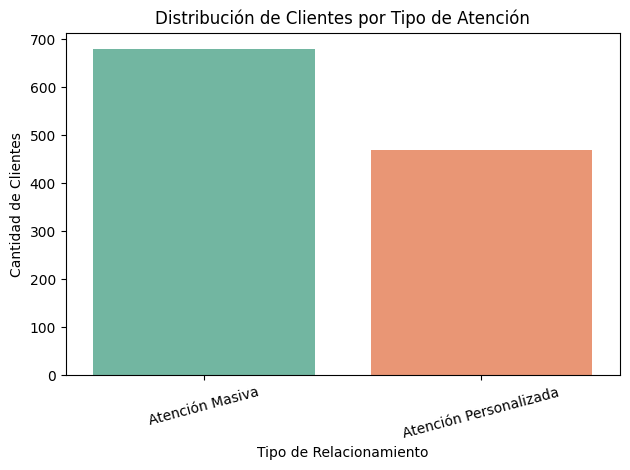

In [173]:
# Conteo de clientes por tipo de relacionamiento
relacionamiento_counts = pca_df['Recomendacion'].value_counts().reset_index()
relacionamiento_counts.columns = ['Tipo de Relacionamiento', 'Número de Clientes']

# Mostrar
print(relacionamiento_counts)

# Visualización
sns.barplot(data=relacionamiento_counts, x='Tipo de Relacionamiento', y='Número de Clientes', palette='Set2')
plt.title('Distribución de Clientes por Tipo de Atención')
plt.xlabel('Tipo de Relacionamiento')
plt.ylabel('Cantidad de Clientes')
plt.xticks(rotation=15)
plt.tight_layout()
plt.show()


  Tipo de Relacionamiento  Número de Clientes
0                  Masivo                 679
1           Personalizado                 469


C:\Users\smart\AppData\Local\Temp\ipykernel_31456\4276050940.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=relacionamiento_counts, x='Tipo de Relacionamiento', y='Número de Clientes', palette='Set2')


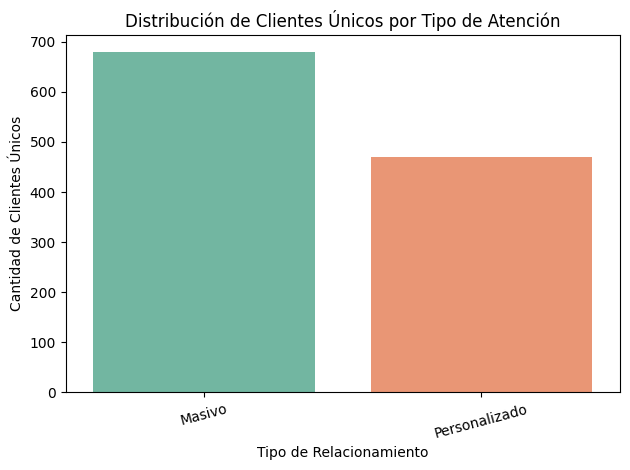

In [174]:
# Paso 1: Agregar la asignación de cluster al DataFrame original
resultado_sql2['Cluster'] = clusters

# Paso 2: Asignar tipo de recomendación basado en el cluster (ajusta esta lógica según tu criterio real)
def asignar_recomendacion(cluster):
    if cluster == 0:
        return 'Masivo'
    elif cluster == 1:
        return 'Personalizado'
    else:
        return 'Mixto'  # Solo si tienes más de 2 clusters

resultado_sql2['Recomendacion'] = resultado_sql2['Cluster'].apply(asignar_recomendacion)

# Paso 3: Eliminar duplicados por ID_CLIENTE si fuera necesario
clientes_unicos = resultado_sql2.drop_duplicates(subset='ID')

# Paso 4: Contar cuántos clientes únicos hay por tipo de relacionamiento
relacionamiento_counts = clientes_unicos['Recomendacion'].value_counts().reset_index()
relacionamiento_counts.columns = ['Tipo de Relacionamiento', 'Número de Clientes']

# Mostrar
print(relacionamiento_counts)

# Paso 5: Visualización
import seaborn as sns
import matplotlib.pyplot as plt

sns.barplot(data=relacionamiento_counts, x='Tipo de Relacionamiento', y='Número de Clientes', palette='Set2')
plt.title('Distribución de Clientes Únicos por Tipo de Atención')
plt.xlabel('Tipo de Relacionamiento')
plt.ylabel('Cantidad de Clientes Únicos')
plt.xticks(rotation=15)
plt.tight_layout()
plt.show()




### **BONUS (Modelo teniendo en cuenta otros productos y probabilidad de siniestro)**

**CÁLCULO DE CAPACIDAD DE INGENIEROS**

Suponiendo que cada ingeniero se demora en promedio 1 hora x visita.

Se parte del supuesto que el total de 7 ingenieros solo cuenta con 700 horas mensuales para atender a los de 'Atención Personalizada' pero estos son 2056,

se decide tener en cuenta otras variables.

### OBTENCIÓN DE LA VARIABLE 'PROBABILIDAD DE SINIESTRO'

In [175]:
# Crear variable objetivo binaria: 1 si tuvo siniestros, 0 si no
resultado_sql2['tuvo_siniestro'] = resultado_sql2['CANTIDAD_SINIESTROS_DESDE_2019'].apply(lambda x: 1 if x > 0 else 0)


In [176]:
resultado_sql2

,ID,ciudad,region,GRUPO_SECTOR,ANO_CONSTITUCION,ANTIGUEDAD_CLIENTE,VALOR_ASEGURADO,PRIMA_EMITIDA,TOTAL_INGRESOS_OPERATIVOS_CORREGIDOS,CODIGO_RAMO_EMISION,...,PRIMA_EMITIDA_log,CANTIDAD_SINIESTROS_DESDE_2019_log,LIQUIDADO_DESDE_2019_log,max_num_productos,num_productos,Cluster,Recomendacion,tuvo_siniestro,prob_siniestro,Relacionamiento
0,111901.0,Cali,Valle del Cauca,G - comercio al por mayor y al por menor; repa...,2005.0,3.0,1.610576e+10,1.134042e+07,4.644423e+09,66.0,...,16.243884,0.693147,13.772455,2,2,0,Masivo,1,1.000,Atención Masiva
1,111909.0,Bucaramanga,Santander,C - industrias manufactureras,1994.0,18.0,7.423784e+10,1.344719e+07,4.534520e+10,70.0,...,16.414281,4.174387,19.771188,2,2,1,Personalizado,1,1.000,Atención Masiva
2,112213.0,Puerto Berrio,Antioquia,C - industrias manufactureras,2015.0,5.0,5.920486e+10,2.177590e+07,9.896008e+09,4.0,...,16.896314,1.011601,16.853647,4,4,0,Masivo,1,1.000,Atención Masiva
3,112408.0,Yumbo,Valle del Cauca,G - comercio al por mayor y al por menor; repa...,2008.0,5.0,8.120277e+10,4.029395e+07,1.368014e+11,1.0,...,17.511712,1.609438,18.001425,6,6,1,Personalizado,1,1.000,Atención Masiva
4,115210.0,Bogota D.C.,Bogota D.C,G - comercio al por mayor y al por menor; repa...,2009.0,6.0,2.513237e+11,2.034452e+08,5.060908e+11,70.0,...,19.130907,2.140066,16.955740,6,6,1,Personalizado,1,0.998,Atención Masiva
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1143,998158.0,Cali,Valle del Cauca,C - industrias manufactureras,2005.0,2.0,3.840000e+10,9.070000e+06,1.629423e+10,15.0,...,16.020483,1.098612,16.076628,1,1,0,Masivo,1,1.000,Atención Masiva
1144,998472.0,Bogota D.C.,Bogota D.C,G - comercio al por mayor y al por menor; repa...,2009.0,9.0,4.263525e+09,4.302386e+06,4.647091e+09,1.0,...,15.274680,0.223144,13.652303,4,4,0,Masivo,1,1.000,Atención Masiva
1145,999204.0,Medellin,Antioquia,G - comercio al por mayor y al por menor; repa...,1996.0,11.0,4.291209e+09,4.054791e+06,5.215123e+09,1.0,...,15.215410,1.252763,16.695719,4,4,0,Masivo,1,1.000,Atención Masiva
1146,999402.0,Bogota D.C.,Bogota D.C,G - comercio al por mayor y al por menor; repa...,1978.0,12.0,1.069365e+10,9.142559e+06,1.515440e+10,70.0,...,16.028451,1.749200,17.448080,4,4,0,Masivo,1,1.000,Atención Masiva


   tuvo_siniestro  Número de Clientes
0               1                1099
1               0                  49


C:\Users\smart\AppData\Local\Temp\ipykernel_31456\4203327334.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=tuvosiniestro_counts, x='tuvo_siniestro', y='Número de Clientes', palette='Set2')


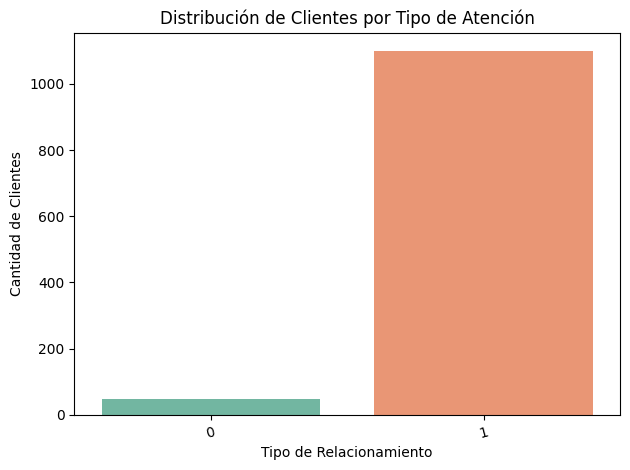

In [177]:
# Conteo de clientes por tipo de tuvo_siniestro
tuvosiniestro_counts = resultado_sql2['tuvo_siniestro'].value_counts().reset_index()
tuvosiniestro_counts.columns = ['tuvo_siniestro', 'Número de Clientes']

# Mostrar
print(tuvosiniestro_counts)

# Visualización
sns.barplot(data=tuvosiniestro_counts, x='tuvo_siniestro', y='Número de Clientes', palette='Set2')
plt.title('Distribución de Clientes por Tipo de Atención')
plt.xlabel('Tipo de Relacionamiento')
plt.ylabel('Cantidad de Clientes')
plt.xticks(rotation=15)
plt.tight_layout()
plt.show()

In [178]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score, classification_report

# Features
features = [
    'ANTIGUEDAD_CLIENTE', 'VALOR_ASEGURADO_log', 'PRIMA_EMITIDA_log',
    'TOTAL_INGRESOS_OPERATIVOS_CORREGIDOS_log', 'LIQUIDADO_DESDE_2019_log'
]

X = resultado_sql2[features]
y = resultado_sql2['tuvo_siniestro']

# Entrenamiento / prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Modelo
rf = RandomForestClassifier(n_estimators=500, random_state=42)
rf.fit(X_train, y_train)

# Evaluación
y_pred = rf.predict(X_test)
print(classification_report(y_test, y_pred))
print("ROC-AUC:", roc_auc_score(y_test, rf.predict_proba(X_test)[:,1]))


              precision    recall  f1-score   support

           0       0.71      0.92      0.80        13
           1       1.00      0.98      0.99       217

    accuracy                           0.97       230
   macro avg       0.85      0.95      0.89       230
weighted avg       0.98      0.97      0.98       230

ROC-AUC: 0.9865295994328251


In [179]:
# Probabilidad de siniestro para cada cliente
resultado_sql2['prob_siniestro'] = rf.predict_proba(X)[:,1]


### PROPUESTA DE NUEVA CLASIFICACIÓN

In [192]:
# Asegurándonos de que 'Cluster' sea de tipo entero
resultado_sql2['Cluster'] = resultado_sql2['Cluster'].astype(int)

# Función de clasificación ajustada para optimizar parámetros y balancear las clases
def nueva_clasificacion(row):
    # Verificar si la ciudad es Bogotá (suponiendo que existe una columna 'ciudad_Bogota D.C')
    es_bogota = row['ciudad'] == 'Bogota D.C.'
    
    # Verificar si el cliente pertenece a los sectores G (Comercio) o C (Industrias manufactureras)
    pertenece_a_sector_G = row['GRUPO_SECTOR'] == 'G - comercio al por mayor y al por menor; reparacion de vehiculos automotores y motocicletas'
    pertenece_a_sector_C = row['GRUPO_SECTOR'] == 'C - industrias manufactureras'
    
    
    # Ajuste dinámico de umbrales basado en la distribución de los datos
    umbral_prob_siniestro = 0.7
    umbral_num_productos = 5
    umbral_antiguedad_cliente = 8
    umbral_prima_emitida = 15
    umbral_seguro_emitido = 20
    umbral_liquidado_2019 = 10
    
    # Ajustar umbrales para equilibrar las clases si es necesario
    if row['Cluster'] == 1 and (row['prob_siniestro'] >= umbral_prob_siniestro or row['num_productos'] >= umbral_num_productos):
            return 'Relación Estratégica'  # Alta prioridad, riesgo alto, engagement alto
    
    else:
            return 'Acercamiento Masivo'
    
    return 'Atención Masiva'  # Default

# Aplicar la clasificación al DataFrame
resultado_sql2['Relacionamiento'] = resultado_sql2.apply(nueva_clasificacion, axis=1)



  Tipo de Relacionamiento  Número de Clientes
0     Acercamiento Masivo                 680
1    Relación Estratégica                 468


C:\Users\smart\AppData\Local\Temp\ipykernel_31456\4228509789.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=relacionamiento_counts, x='Tipo de Relacionamiento', y='Número de Clientes', palette='Set2')


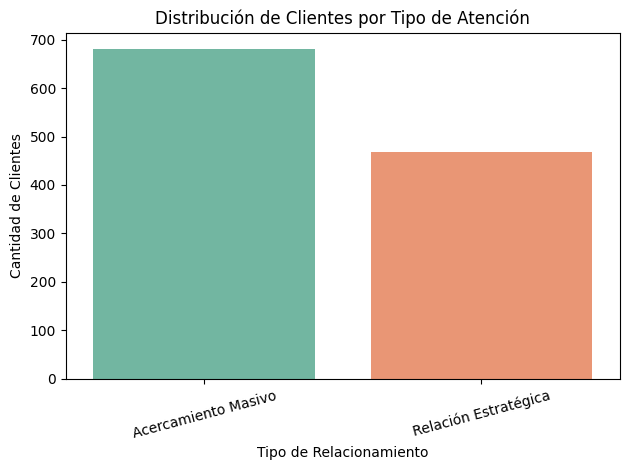

In [193]:
# Verificar la distribución de clientes
relacionamiento_counts = resultado_sql2['Relacionamiento'].value_counts().reset_index()
relacionamiento_counts.columns = ['Tipo de Relacionamiento', 'Número de Clientes']

# Mostrar
print(relacionamiento_counts)

# Visualización

sns.barplot(data=relacionamiento_counts, x='Tipo de Relacionamiento', y='Número de Clientes', palette='Set2')
plt.title('Distribución de Clientes por Tipo de Atención')
plt.xlabel('Tipo de Relacionamiento')
plt.ylabel('Cantidad de Clientes')
plt.xticks(rotation=15)
plt.tight_layout()
plt.show()



       num_productos  ANTIGUEDAD_CLIENTE  PRIMA_EMITIDA_log
count    1148.000000         1148.000000        1148.000000
mean        3.204704           10.234321          16.471488
std         2.154231            8.042497           1.205766
min         1.000000            0.000000          13.090875
25%         2.000000            4.000000          15.626212
50%         3.000000            8.000000          16.357995
75%         4.000000           16.000000          17.228478
max        22.000000           28.000000          23.833301


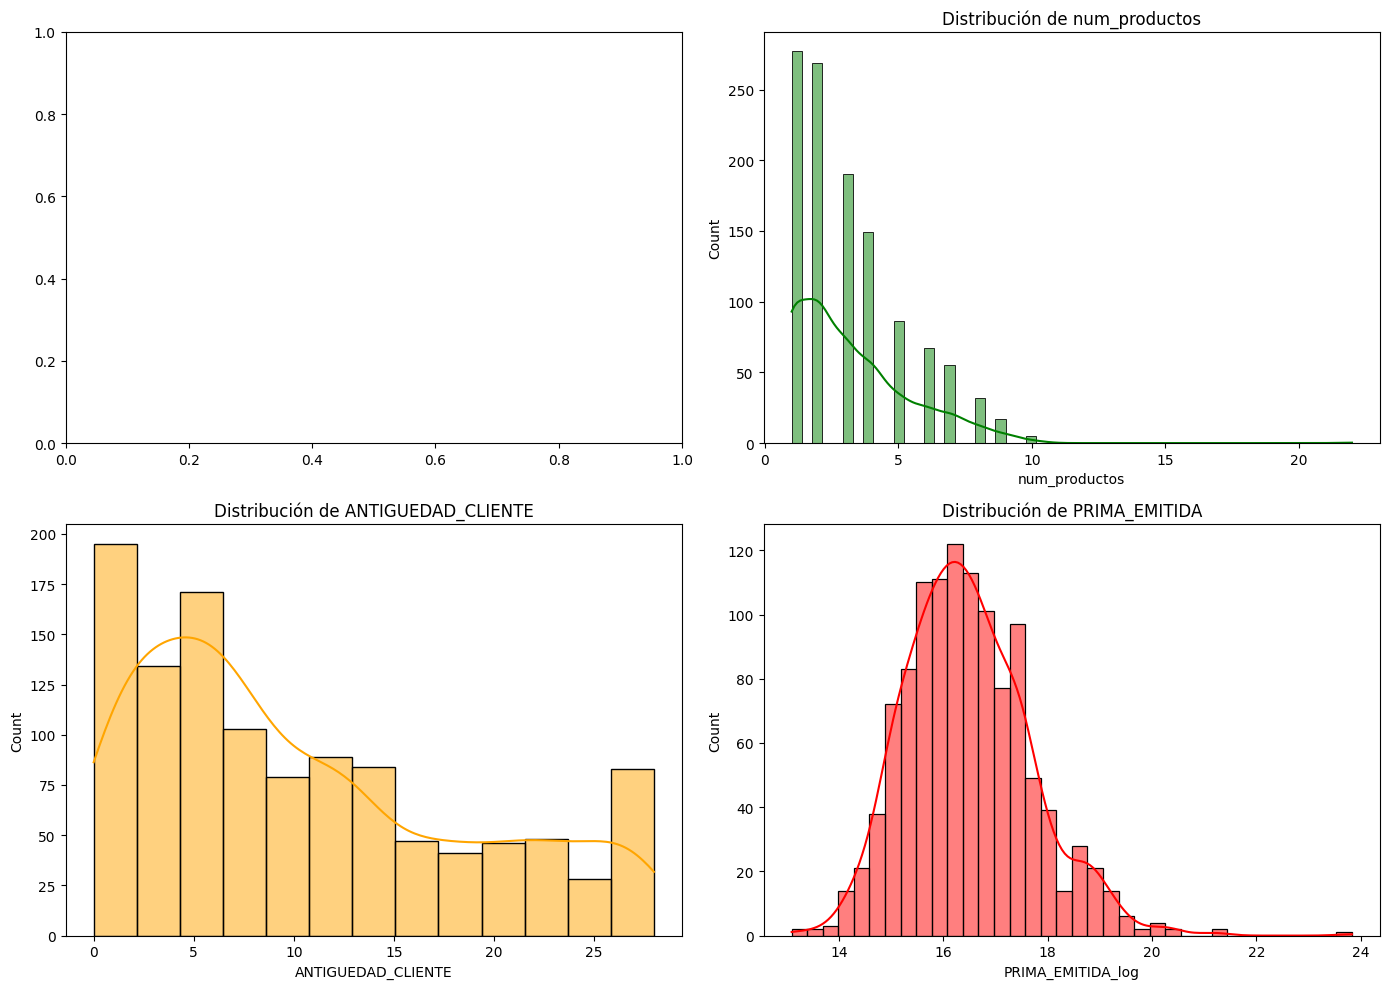

In [199]:
import matplotlib.pyplot as plt
import seaborn as sns

# Estadísticas descriptivas de las variables clave
estadisticas = resultado_sql2[[ 'num_productos', 'ANTIGUEDAD_CLIENTE', 'PRIMA_EMITIDA_log']].describe()
print(estadisticas)

# Graficar las distribuciones de cada variable
fig, axes = plt.subplots(2, 2, figsize=(14, 10))



# Número de productos
sns.histplot(resultado_sql2['num_productos'], kde=True, ax=axes[0, 1], color='green')
axes[0, 1].set_title('Distribución de num_productos')

# Antigüedad del cliente
sns.histplot(resultado_sql2['ANTIGUEDAD_CLIENTE'], kde=True, ax=axes[1, 0], color='orange')
axes[1, 0].set_title('Distribución de ANTIGUEDAD_CLIENTE')

# Prima emitida
sns.histplot(resultado_sql2['PRIMA_EMITIDA_log'], kde=True, ax=axes[1, 1], color='red')
axes[1, 1].set_title('Distribución de PRIMA_EMITIDA')

plt.tight_layout()
plt.show()


In [200]:
ids_explotado = resultado_sql2[['Recomendacion', 'ID']].drop_duplicates()
print(ids_explotado.sort_values(by='Recomendacion'))


     Recomendacion        ID
0           Masivo  111901.0
643         Masivo  607816.0
646         Masivo  610158.0
647         Masivo  610663.0
649         Masivo  613446.0
..             ...       ...
347  Personalizado  364390.0
794  Personalizado  729625.0
793  Personalizado  728912.0
349  Personalizado  365117.0
573  Personalizado  551767.0

[1148 rows x 2 columns]


In [201]:
ids_unicos = resultado_sql2['ID'].dropna().unique()
print(ids_unicos)
print(f"\nCantidad total de IDs únicos: {len(ids_unicos)}")


[111901. 111909. 112213. ... 999204. 999402. 999850.]

Cantidad total de IDs únicos: 1148


In [202]:
resultado_sql2

,ID,ciudad,region,GRUPO_SECTOR,ANO_CONSTITUCION,ANTIGUEDAD_CLIENTE,VALOR_ASEGURADO,PRIMA_EMITIDA,TOTAL_INGRESOS_OPERATIVOS_CORREGIDOS,CODIGO_RAMO_EMISION,...,PRIMA_EMITIDA_log,CANTIDAD_SINIESTROS_DESDE_2019_log,LIQUIDADO_DESDE_2019_log,max_num_productos,num_productos,Cluster,Recomendacion,tuvo_siniestro,prob_siniestro,Relacionamiento
0,111901.0,Cali,Valle del Cauca,G - comercio al por mayor y al por menor; repa...,2005.0,3.0,1.610576e+10,1.134042e+07,4.644423e+09,66.0,...,16.243884,0.693147,13.772455,2,2,0,Masivo,1,1.000,Acercamiento Masivo
1,111909.0,Bucaramanga,Santander,C - industrias manufactureras,1994.0,18.0,7.423784e+10,1.344719e+07,4.534520e+10,70.0,...,16.414281,4.174387,19.771188,2,2,1,Personalizado,1,1.000,Relación Estratégica
2,112213.0,Puerto Berrio,Antioquia,C - industrias manufactureras,2015.0,5.0,5.920486e+10,2.177590e+07,9.896008e+09,4.0,...,16.896314,1.011601,16.853647,4,4,0,Masivo,1,1.000,Acercamiento Masivo
3,112408.0,Yumbo,Valle del Cauca,G - comercio al por mayor y al por menor; repa...,2008.0,5.0,8.120277e+10,4.029395e+07,1.368014e+11,1.0,...,17.511712,1.609438,18.001425,6,6,1,Personalizado,1,1.000,Relación Estratégica
4,115210.0,Bogota D.C.,Bogota D.C,G - comercio al por mayor y al por menor; repa...,2009.0,6.0,2.513237e+11,2.034452e+08,5.060908e+11,70.0,...,19.130907,2.140066,16.955740,6,6,1,Personalizado,1,0.998,Relación Estratégica
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1143,998158.0,Cali,Valle del Cauca,C - industrias manufactureras,2005.0,2.0,3.840000e+10,9.070000e+06,1.629423e+10,15.0,...,16.020483,1.098612,16.076628,1,1,0,Masivo,1,1.000,Acercamiento Masivo
1144,998472.0,Bogota D.C.,Bogota D.C,G - comercio al por mayor y al por menor; repa...,2009.0,9.0,4.263525e+09,4.302386e+06,4.647091e+09,1.0,...,15.274680,0.223144,13.652303,4,4,0,Masivo,1,1.000,Acercamiento Masivo
1145,999204.0,Medellin,Antioquia,G - comercio al por mayor y al por menor; repa...,1996.0,11.0,4.291209e+09,4.054791e+06,5.215123e+09,1.0,...,15.215410,1.252763,16.695719,4,4,0,Masivo,1,1.000,Acercamiento Masivo
1146,999402.0,Bogota D.C.,Bogota D.C,G - comercio al por mayor y al por menor; repa...,1978.0,12.0,1.069365e+10,9.142559e+06,1.515440e+10,70.0,...,16.028451,1.749200,17.448080,4,4,0,Masivo,1,1.000,Acercamiento Masivo


In [204]:
resultado_sql2.to_excel("resultados_confirmados_estesi_final_final.xlsx", index=False)

In [ ]:
resultado_sql2

,ID,ciudad,region,GRUPO_SECTOR,ANO_CONSTITUCION,ANTIGUEDAD_CLIENTE,VALOR_ASEGURADO,PRIMA_EMITIDA,TOTAL_INGRESOS_OPERATIVOS_CORREGIDOS,CODIGO_RAMO_EMISION,NOMBRE_RAMO_EMISION,CANTIDAD_SINIESTROS_DESDE_2019,LIQUIDADO_DESDE_2019,TOTAL_INGRESOS_OPERATIVOS_CORREGIDOS_log,VALOR_ASEGURADO_log,PRIMA_EMITIDA_log,CANTIDAD_SINIESTROS_DESDE_2019_log,LIQUIDADO_DESDE_2019_log,num_productos
0,111901.0,Cali,Valle del Cauca,G - comercio al por mayor y al por menor; repa...,2005.0,3.0,1.748899e+10,11030693.0,4.644423e+09,66.0,PRODUCTO 16,0.0,0.0,22.258933,23.584837,16.216192,0.000000,0.000000,2
1,111901.0,Cali,Valle del Cauca,G - comercio al por mayor y al por menor; repa...,2005.0,3.0,1.472254e+10,11650146.0,4.644423e+09,15.0,PRODUCTO 24,2.0,1915714.0,22.258933,23.412645,16.270829,1.098612,14.465601,2
2,111909.0,Bucaramanga,Santander,C - industrias manufactureras,1994.0,18.0,7.236728e+09,0.0,4.534520e+10,70.0,PRODUCTO 2,119.0,590590896.0,24.537570,22.702435,0.000000,4.787492,20.196634,2
3,111909.0,Bucaramanga,Santander,C - industrias manufactureras,1994.0,18.0,1.412390e+11,26894382.0,4.534520e+10,15.0,PRODUCTO 24,9.0,181285852.0,24.537570,25.673719,17.107428,2.302585,19.015586,2
4,112213.0,Puerto Berrio,Antioquia,C - industrias manufactureras,2015.0,5.0,6.961125e+10,44726790.0,9.896008e+09,5.0,PRODUCTO 14,4.0,54441510.0,23.015397,24.966192,17.616083,1.609438,17.812637,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3674,999402.0,Bogota D.C.,Bogota D.C,G - comercio al por mayor y al por menor; repa...,1978.0,12.0,8.521800e+09,7601197.0,1.515440e+10,1.0,PRODUCTO 4,6.0,94380397.0,23.441557,22.865893,15.843816,1.945910,18.362844,4
3675,999850.0,Santa Marta,Magdalena,H - transporte y almacenamiento,2012.0,2.0,2.500000e+07,1155000.0,1.139401e+10,7.0,PRODUCTO 15,0.0,0.0,23.156353,17.034386,13.959612,0.000000,0.000000,4
3676,999850.0,Santa Marta,Magdalena,H - transporte y almacenamiento,2012.0,2.0,8.700000e+09,2165622.0,1.139401e+10,10.0,PRODUCTO 17,0.0,0.0,23.156353,22.886589,14.588219,0.000000,0.000000,4
3677,999850.0,Santa Marta,Magdalena,H - transporte y almacenamiento,2012.0,2.0,0.000000e+00,14151200.0,1.139401e+10,310.0,PRODUCTO 21,0.0,0.0,23.156353,0.000000,16.465310,0.000000,0.000000,4


In [ ]:
print(resultado_sql2_encoded[['prob_siniestro', 'num_productos']].describe())


       prob_siniestro  num_productos
count     3679.000000    3679.000000
mean         0.623066       4.651536
std          0.460072       2.659040
min          0.000000       1.000000
25%          0.044000       3.000000
50%          0.998000       4.000000
75%          1.000000       6.000000
max          1.000000      22.000000


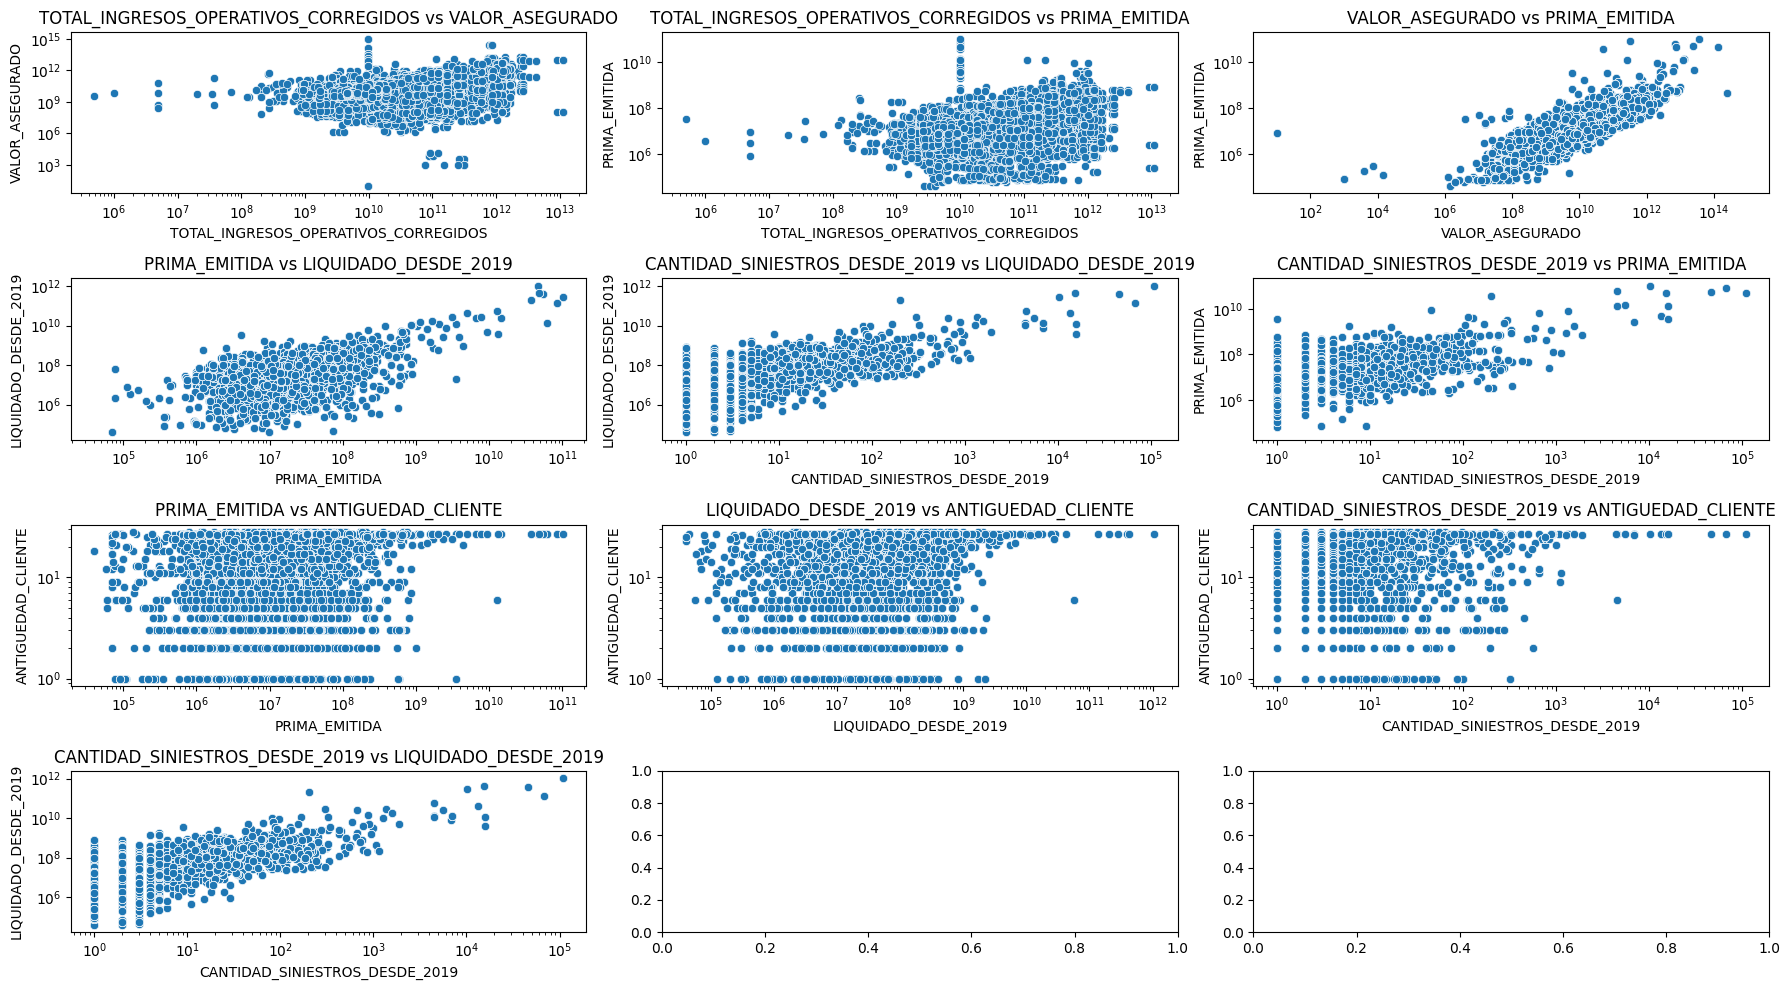

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Lista de pares de variables a cruzar
scatter_pairs = [
    ('TOTAL_INGRESOS_OPERATIVOS_CORREGIDOS', 'VALOR_ASEGURADO'),
    ('TOTAL_INGRESOS_OPERATIVOS_CORREGIDOS', 'PRIMA_EMITIDA'),
    ('VALOR_ASEGURADO', 'PRIMA_EMITIDA'),
    ('PRIMA_EMITIDA', 'LIQUIDADO_DESDE_2019'),
    ('CANTIDAD_SINIESTROS_DESDE_2019', 'LIQUIDADO_DESDE_2019'),
    ('CANTIDAD_SINIESTROS_DESDE_2019', 'PRIMA_EMITIDA'),
    ('PRIMA_EMITIDA','ANTIGUEDAD_CLIENTE'),
    ('LIQUIDADO_DESDE_2019','ANTIGUEDAD_CLIENTE'),
    ('CANTIDAD_SINIESTROS_DESDE_2019','ANTIGUEDAD_CLIENTE'),
    ('CANTIDAD_SINIESTROS_DESDE_2019','LIQUIDADO_DESDE_2019')
]

# Tamaño de la figura y distribución de subplots
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(18, 10))
axes = axes.flatten()

for i, (x_var, y_var) in enumerate(scatter_pairs):
    sns.scatterplot(data=df2_clean, x=x_var, y=y_var, ax=axes[i])
    axes[i].set_title(f'{x_var} vs {y_var}')
    axes[i].set_xscale('log')
    axes[i].set_yscale('log')
    axes[i].set_xlabel(x_var)
    axes[i].set_ylabel(y_var)

plt.tight_layout()
plt.show()



ValueError: Could not interpret value `TOTAL_INGRESOS_OPERATIVOS_CORREGIDOS_log` for `x`. An entry with this name does not appear in `data`.

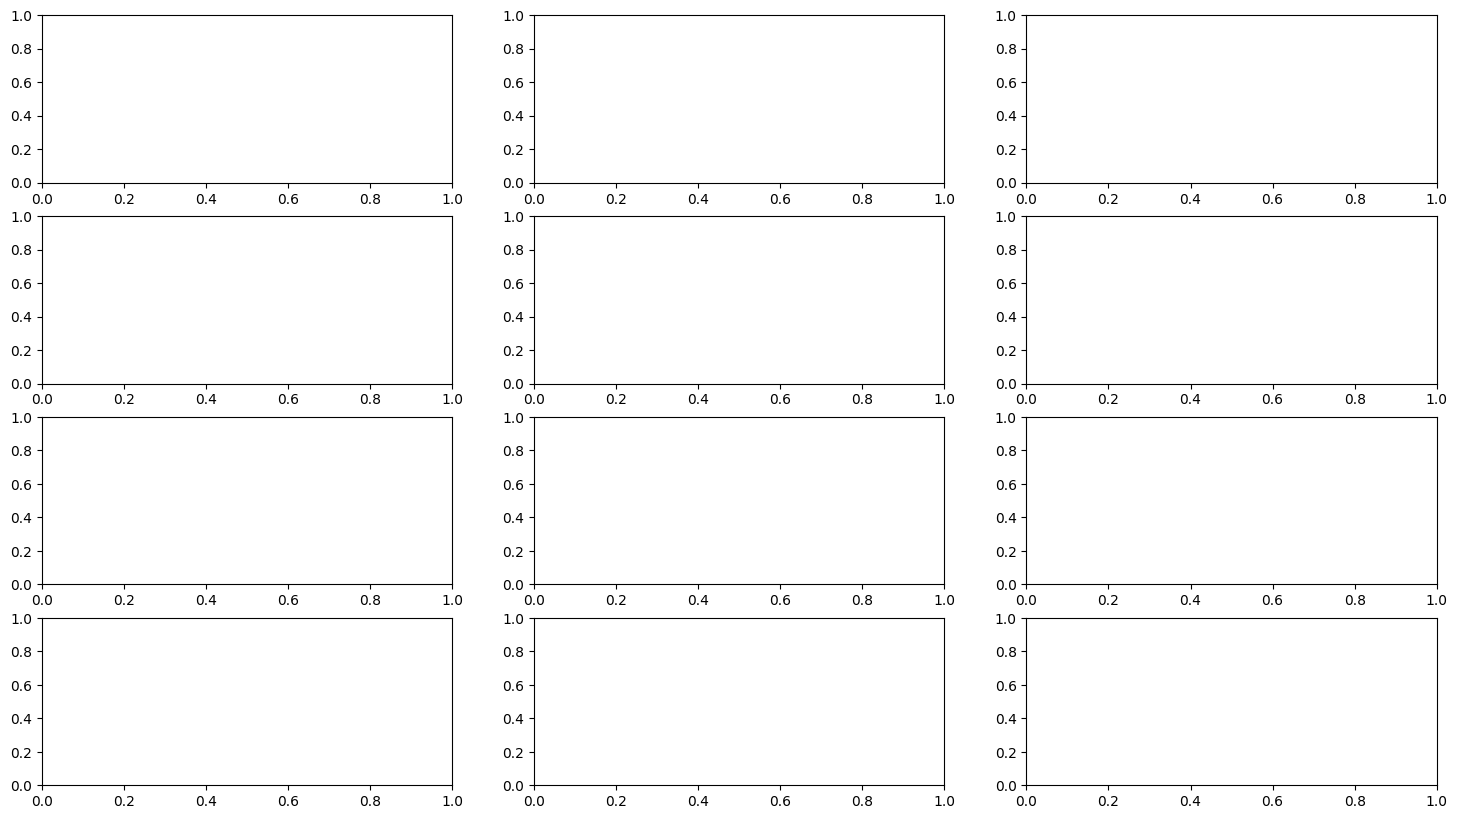

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Lista de pares de variables a cruzar
scatter_pairs = [
    ('TOTAL_INGRESOS_OPERATIVOS_CORREGIDOS_log', 'VALOR_ASEGURADO_log'),
    ('TOTAL_INGRESOS_OPERATIVOS_CORREGIDOS_log', 'PRIMA_EMITIDA_log'),
    ('VALOR_ASEGURADO_log', 'PRIMA_EMITIDA_log'),
    ('PRIMA_EMITIDA_log', 'LIQUIDADO_DESDE_2019_log'),
    ('CANTIDAD_SINIESTROS_DESDE_2019_log', 'LIQUIDADO_DESDE_2019_log'),
    ('CANTIDAD_SINIESTROS_DESDE_2019_log', 'PRIMA_EMITIDA_log'),
    ('PRIMA_EMITIDA_log','ANTIGUEDAD_CLIENTE'),
    ('LIQUIDADO_DESDE_2019_log','ANTIGUEDAD_CLIENTE'),
    ('CANTIDAD_SINIESTROS_DESDE_2019_log','ANTIGUEDAD_CLIENTE'),
    ('CANTIDAD_SINIESTROS_DESDE_2019_log','LIQUIDADO_DESDE_2019_log')
]

# Tamaño de la figura y distribución de subplots
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(18, 10))
axes = axes.flatten()

for i, (x_var, y_var) in enumerate(scatter_pairs):
    sns.scatterplot(data=df2_clean, x=x_var, y=y_var, ax=axes[i])
    axes[i].set_title(f'{x_var} vs {y_var}')
    axes[i].set_xscale('log')
    axes[i].set_yscale('log')
    axes[i].set_xlabel(x_var)
    axes[i].set_ylabel(y_var)

plt.tight_layout()
plt.show()


In [ ]:
# Ver las cargas (coeficientes) de los componentes principales
componentes = pd.DataFrame(pca.components_, columns=features, index=['PCA1', 'PCA2'])

# Mostrar las cargas
print(componentes)


      TOTAL_INGRESOS_OPERATIVOS_CORREGIDOS  VALOR_ASEGURADO  PRIMA_EMITIDA  \
PCA1                              0.216033         0.404647       0.538759   
PCA2                              0.600672         0.542552       0.107898   

      LIQUIDADO_DESDE_2019  CANTIDAD_SINIESTROS_DESDE_2019  
PCA1              0.512231                        0.486773  
PCA2             -0.399346                       -0.416787  
